# ***AutoML-HyperTuning Assignment ***
# Poornachandra Kongara

# **Abstract**

The objective was to develop a model that can accurately predict the factors contributing to hair loss in individuals. Hair loss is influenced by various factors, making it difficult to predict with precision. To construct the model, independent variables that have a significant impact on hair loss were identified, and a linear regression model was established using these variables. The model was then tested on the Luke Hair Loss Dataset. The analysis revealed that the linear regression model can effectively predict and analyze hair loss to some extent, but there is room for improvement through the use of more advanced machine learning methods.


# **Data Set** 
The data set consists of :

1] 12 physical characteristics of hair loss i.e. 

 1.   stay_up_late             
 2.   pressure_level          
 3.   coffee_consumed           
 4.   brain_working_duration    
 5.   school_assesssment       
 6.   stress_level             
 7.   shampoo_brand            
 8.   swimming                
 9.  hair_washing             
 10.  hair_grease             
 11.  dandruff                 
 12.  libido  
 

 
2] hair_loss - The dependent variable

3] There are a total of 401 observations.

# **Linking the Dataset to the collab**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"poornachandrakongara","key":"7a14e14f1b88ab76b5d1911df8624c81"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide               Covid Cases and Deaths WorldWide                  8KB  2023-02-01 12:22:51           6912        217  1.0              
amaanansari09/top-100-songs                                        Top 100 songs                                     6KB  2023-02-16 18:55:35           1249         45  1.0              
datascientistanna/customers-dataset                                Shop Customer Data                               23KB  2023-02-07 18:42:21           5461        129  1.0              
thedevastator/airbnb-prices-in-european-cities                   

In [ ]:
!kaggle datasets download -d poornachandrakongara/hair-loss-dataset

  0% 0.00/2.26k [00:00<?, ?B/s]
100% 2.26k/2.26k [00:00<00:00, 1.74MB/s]


In [ ]:
!unzip /content/hair-loss-dataset.zip

Archive:  /content/hair-loss-dataset.zip
  inflating: hair_loss_dataset.csv   



# **Required Libraries**

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 4.7 MB/s eta 0:00:00


# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from matplotlib import pyplot
import h2o
from h2o.automl import H2OAutoML
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
sns.set(rc={"figure.figsize": (16, 8)})        #setting the figure size       
import psutil
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

# Setting up maximum runtime for the AutoML


In [ ]:
min_mem_size = 6
run_time = 222

In [ ]:
import psutil
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [ ]:
import random, os, sys
port_no = random.randint(5555, 55555)
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:49780..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpeil2sh6w
  JVM stdout: /tmp/tmpeil2sh6w/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpeil2sh6w/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:49780
Connecting to H2O server at http://127.0.0.1:49780 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_58jrc1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


**Dataset path**

In [ ]:
url = "/content/hair_loss_dataset.csv"
dataFrame = pd.read_csv(url)

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hair_loss               400 non-null    object 
 1   stay_up_late            400 non-null    int64  
 2   pressure_level          400 non-null    object 
 3   coffee_consumed         400 non-null    int64  
 4   brain_working_duration  400 non-null    int64  
 5   school_assesssment      400 non-null    object 
 6   stress_level            400 non-null    object 
 7   shampoo_brand           400 non-null    object 
 8   swimming                400 non-null    object 
 9   hair_washing            400 non-null    object 
 10  hair_grease             396 non-null    float64
 11  dandruff                400 non-null    object 
 12  libido                  400 non-null    int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 40.8+ KB


In [ ]:
#There are 2 types : Numerical and Categorical
#Numerical - stay_up_late, coffee_consumed, brain_working_duration, hair_grease,libido
#Categorical- pressure_level, school_assesssment, stress_level, shampoo_brand, swimming, hair_washing, dandruff

In [ ]:
dataFrame.head(100)

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,Few,2,Low,0,1,None,Low,Pantene,No,Y,3.0,None,1
1,Few,0,Low,0,3,None,Low,Pantene,No,N,1.0,None,1
2,Medium,3,Low,1,0,None,Low,Pantene,Yes,Y,2.0,None,2
3,Few,2,Low,0,1,None,Low,Pantene,No,N,3.0,None,3
4,Few,2,Low,0,1,None,Low,Pantene,No,Y,1.0,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Medium,2,Medium,0,3,None,Medium,Hair & Shoulder,No,Y,3.0,None,5
96,Medium,3,High,3,7,Team ass,High,Hair & Shoulder,No,N,4.0,Few,0
97,Medium,2,High,4,7,Team ass,High,Hair & Shoulder,No,Y,4.0,Few,0
98,Many,2,High,4,7,Team ass,High,Hair & Shoulder,No,N,4.0,Few,0


**Total Observation**

In [ ]:
dataFrame.shape

(400, 13)

In [ ]:
dataFrame.describe()

,stay_up_late,coffee_consumed,brain_working_duration,hair_grease,libido
count,400.000000,400.000000,400.000000,396.000000,400.000000
mean,1.910000,1.162500,3.970000,2.565657,2.787500
std,1.611954,1.978859,4.215272,1.276162,1.822264
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,3.000000
75%,3.000000,1.000000,7.000000,4.000000,5.000000
max,8.000000,10.000000,18.000000,5.000000,5.000000


***Data is missing from the column hair_grease column, which means it is  required to impute or remove the null values from the data ***


In [ ]:
dataFrame.isna().sum()

hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
school_assesssment        0
stress_level              0
shampoo_brand             0
swimming                  0
hair_washing              0
hair_grease               4
dandruff                  0
libido                    0
dtype: int64

**The independent variable hair_grease has missing data and the total number of missing data is 4**

In [ ]:
#https://www.youtube.com/watch?v=fYhr8eF1ubo Reference for imputation techniques
#Used the mean replacement technique as the missing values were not correlated and were less in number
imputed_data = dataFrame.fillna(dataFrame.mean())
imputed_data.head(100)

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,Few,2,Low,0,1,None,Low,Pantene,No,Y,3.0,None,1
1,Few,0,Low,0,3,None,Low,Pantene,No,N,1.0,None,1
2,Medium,3,Low,1,0,None,Low,Pantene,Yes,Y,2.0,None,2
3,Few,2,Low,0,1,None,Low,Pantene,No,N,3.0,None,3
4,Few,2,Low,0,1,None,Low,Pantene,No,Y,1.0,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Medium,2,Medium,0,3,None,Medium,Hair & Shoulder,No,Y,3.0,None,5
96,Medium,3,High,3,7,Team ass,High,Hair & Shoulder,No,N,4.0,Few,0
97,Medium,2,High,4,7,Team ass,High,Hair & Shoulder,No,Y,4.0,Few,0
98,Many,2,High,4,7,Team ass,High,Hair & Shoulder,No,N,4.0,Few,0


In [ ]:
#mean replacement imputation technique
imputed_data.isna().sum()

hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
school_assesssment        0
stress_level              0
shampoo_brand             0
swimming                  0
hair_washing              0
hair_grease               0
dandruff                  0
libido                    0
dtype: int64

In [ ]:
#Replaced categorical value with numerical values as it will be easier to plot qqplots and make assumptions

imputed_data['dandruff'].replace('None',0,inplace=True)
imputed_data['dandruff'].replace('Few',1,inplace=True)
imputed_data['dandruff'].replace('Many',2, inplace=True)

imputed_data['hair_loss'].replace("Few", 0, inplace=True)
imputed_data['hair_loss'].replace("Medium", 2, inplace=True)
imputed_data['hair_loss'].replace("Many", 2, inplace=True)
imputed_data['hair_loss'].replace("A lot", 3, inplace=True)

imputed_data['swimming'].replace('Yes', 1, inplace=True)
imputed_data['swimming'].replace('No', 0, inplace=True)

imputed_data.replace('Low', 0, inplace=True)
imputed_data.replace('Medium', 1, inplace=True)
imputed_data.replace('High', 2, inplace=True)
imputed_data.replace('Very High', 3, inplace=True)

imputed_data.head(100)

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,0,2,0,0,1,None,0,Pantene,0,Y,3.0,0,1
1,0,0,0,0,3,None,0,Pantene,0,N,1.0,0,1
2,2,3,0,1,0,None,0,Pantene,1,Y,2.0,0,2
3,0,2,0,0,1,None,0,Pantene,0,N,3.0,0,3
4,0,2,0,0,1,None,0,Pantene,0,Y,1.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,2,1,0,3,None,1,Hair & Shoulder,0,Y,3.0,0,5
96,2,3,2,3,7,Team ass,2,Hair & Shoulder,0,N,4.0,1,0
97,2,2,2,4,7,Team ass,2,Hair & Shoulder,0,Y,4.0,1,0
98,2,2,2,4,7,Team ass,2,Hair & Shoulder,0,N,4.0,1,0


**QQ Plots:-**

A QQ plot, short for quantile-quantile plot, is a graphical technique used to assess if a set of data points follows a certain distribution, such as a normal distribution


<Figure size 1440x576 with 0 Axes>

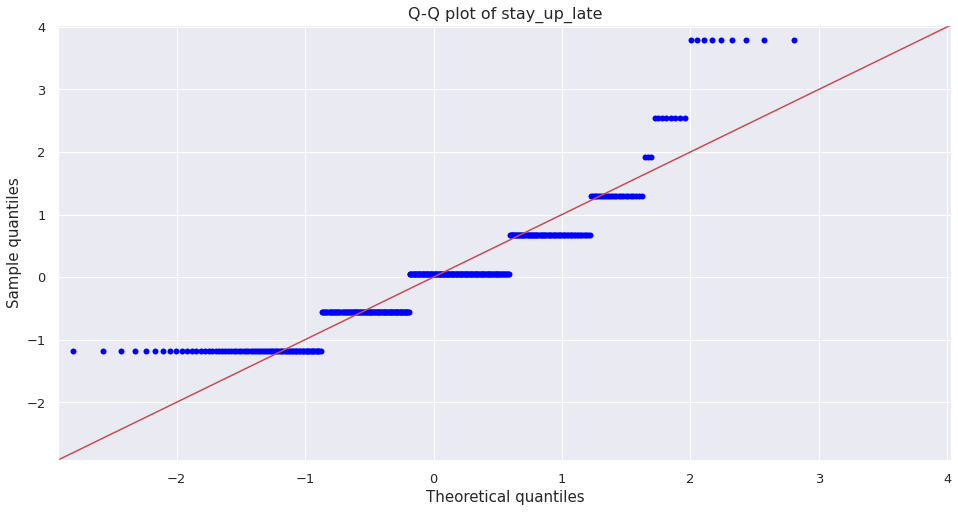

<Figure size 1440x576 with 0 Axes>

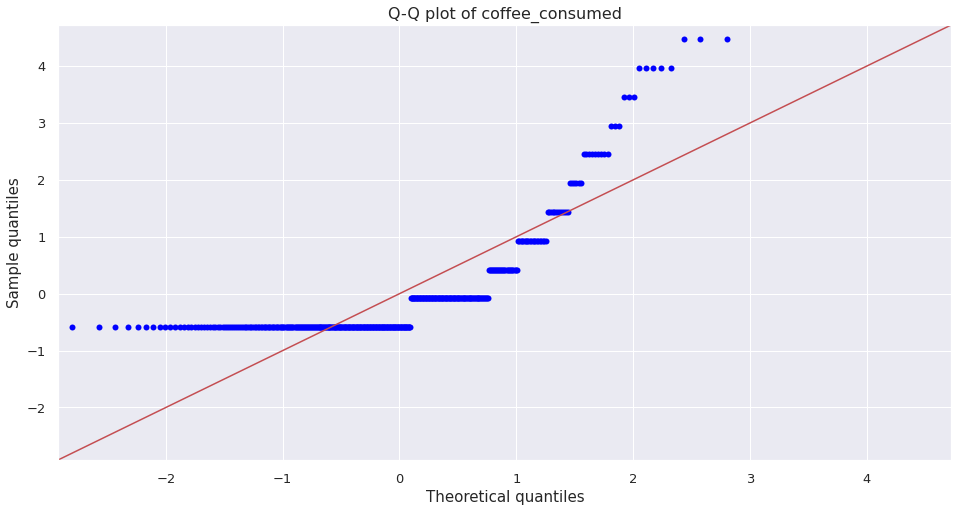

<Figure size 1440x576 with 0 Axes>

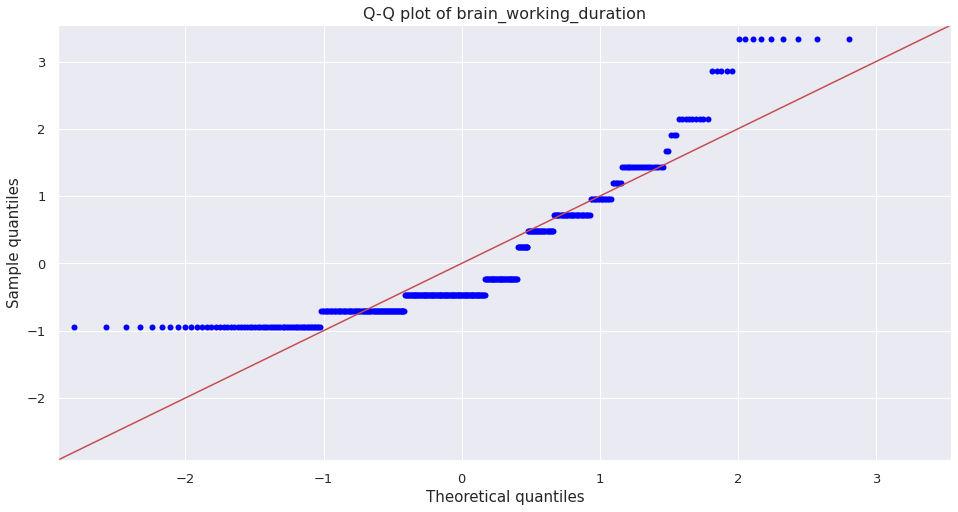

<Figure size 1440x576 with 0 Axes>

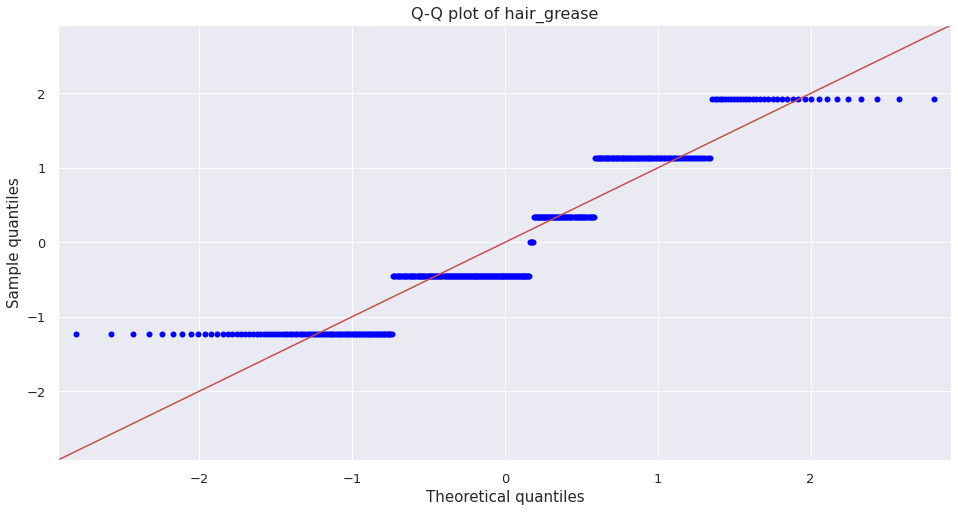

<Figure size 1440x576 with 0 Axes>

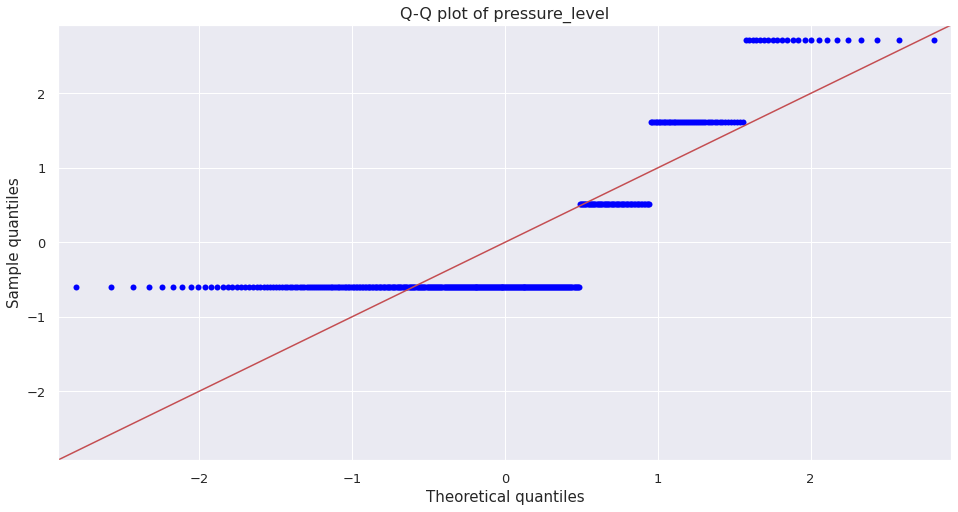

<Figure size 1440x576 with 0 Axes>

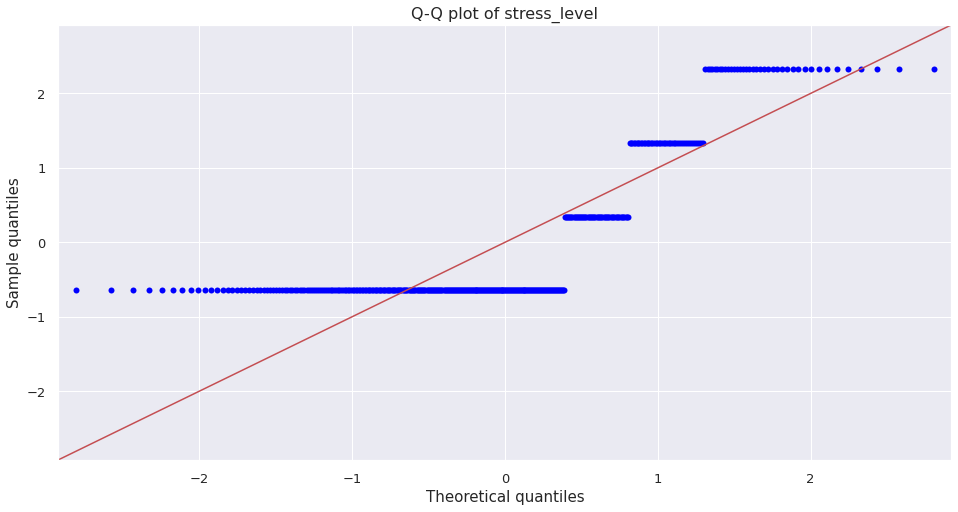

<Figure size 1440x576 with 0 Axes>

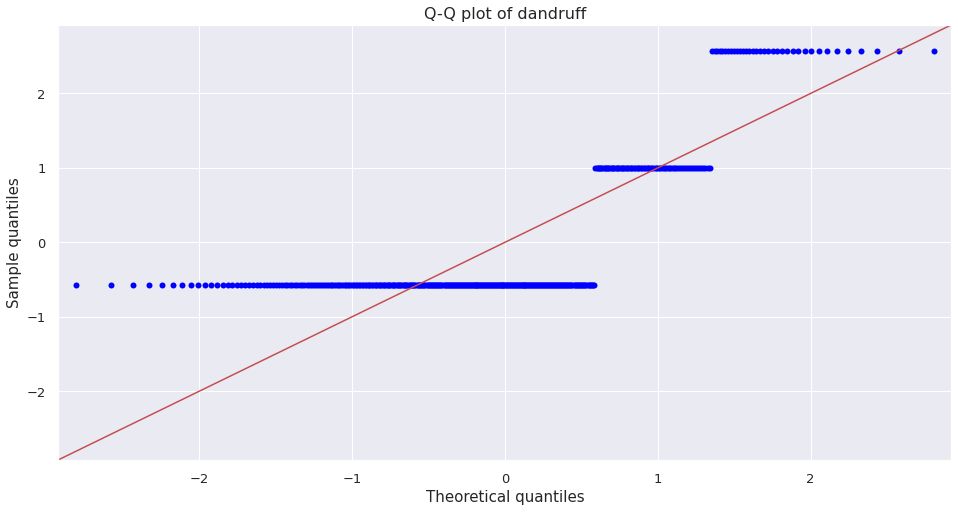

In [ ]:
from statsmodels.graphics.gofplots import qqplot
independent_data=imputed_data[['stay_up_late','coffee_consumed', 'brain_working_duration', 'hair_grease','pressure_level','stress_level','dandruff' ]]
for c in independent_data.columns[:]:
  plt.figure(figsize=(20,8))
  fig=qqplot(independent_data[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()



1. Looking at the Q-Q plot above, it appears that some independent variables are roughly following normal distribution and has a lot of outliers present as the number of data is less.  
2.   There are many outliers in few of the predictor variables like in dandruff, stress level and coffee consumed etc.






# **Correlation Analysis**

In [ ]:
imputed_data.corr()

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,swimming,hair_grease,dandruff,libido
hair_loss,1.000000,0.349901,0.497609,0.518949,0.420956,0.524020,-0.103581,0.505263,0.523293,0.425367
stay_up_late,0.349901,1.000000,0.508844,0.718017,0.603039,0.352284,-0.127301,0.439185,0.477551,-0.061987
pressure_level,0.497609,0.508844,1.000000,0.826228,0.797197,0.889836,-0.269659,0.829852,0.919271,0.066658
coffee_consumed,0.518949,0.718017,0.826228,1.000000,0.847582,0.725233,-0.147065,0.680236,0.811721,0.036706
brain_working_duration,0.420956,0.603039,0.797197,0.847582,1.000000,0.726903,-0.228026,0.717837,0.809451,-0.083707
stress_level,0.524020,0.352284,0.889836,0.725233,0.726903,1.000000,-0.312828,0.747642,0.868707,0.045168
swimming,-0.103581,-0.127301,-0.269659,-0.147065,-0.228026,-0.312828,1.000000,-0.278167,-0.259308,0.087026
hair_grease,0.505263,0.439185,0.829852,0.680236,0.717837,0.747642,-0.278167,1.000000,0.863648,0.059235
dandruff,0.523293,0.477551,0.919271,0.811721,0.809451,0.868707,-0.259308,0.863648,1.000000,0.062513
libido,0.425367,-0.061987,0.066658,0.036706,-0.083707,0.045168,0.087026,0.059235,0.062513,1.000000


# **Boxplots for data outlier checks**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

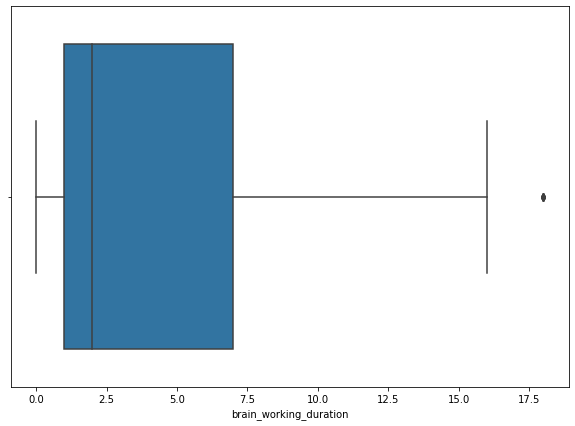

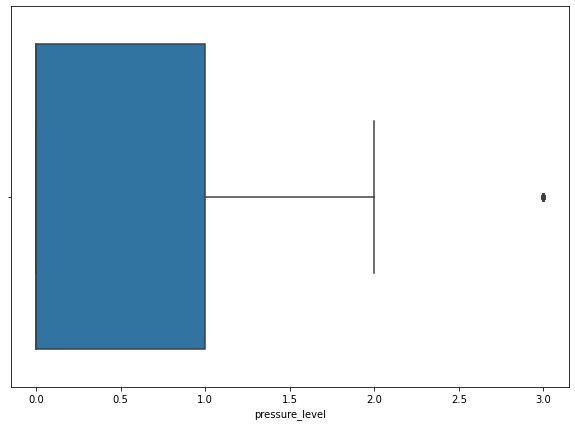

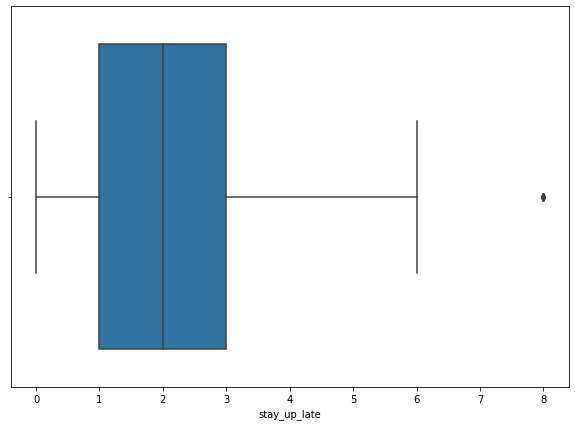

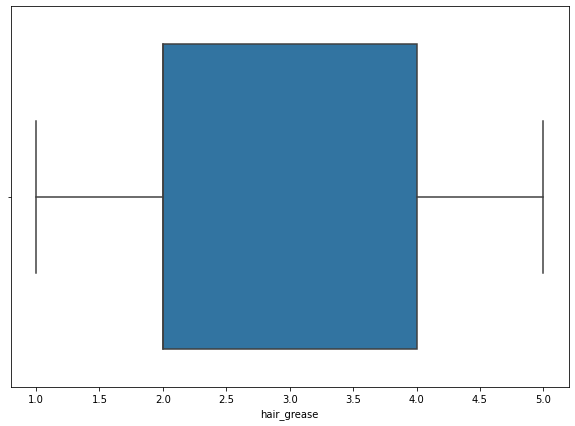

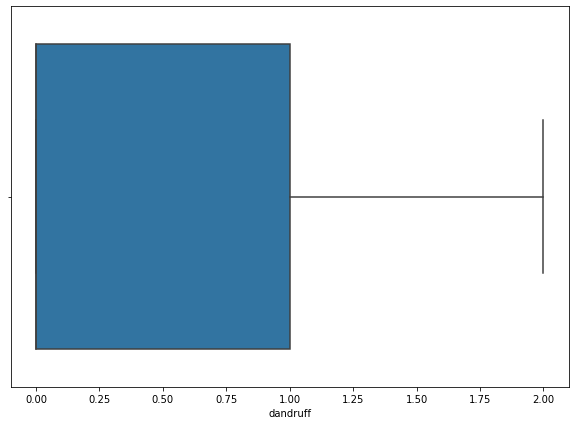

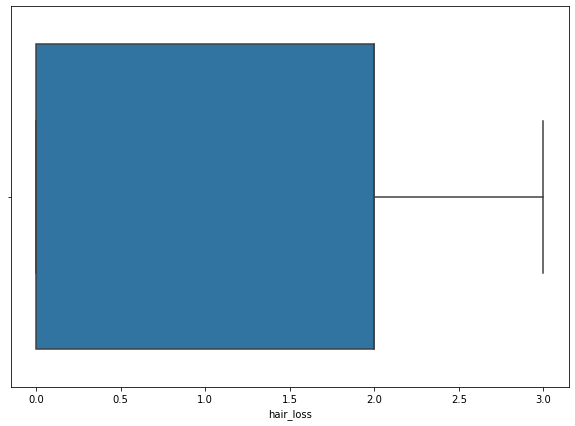

In [ ]:
#Independent Variables
plt.figure(figsize=(10,7))
sns.boxplot(imputed_data['brain_working_duration'])
plt.figure(figsize=(10,7))
sns.boxplot(imputed_data['pressure_level'])
plt.figure(figsize=(10,7))
sns.boxplot(imputed_data['stay_up_late'])
plt.figure(figsize=(10,7))
sns.boxplot(imputed_data['hair_grease'])
plt.figure(figsize=(10,7))
sns.boxplot(imputed_data['dandruff'])

#Dependent Variable
plt.figure(figsize=(10,7))
sns.boxplot(imputed_data['hair_loss'])


It is clear to visualize and interpret the data. Looking at the boxplot above, we can infer below:
1. Brain Working Duration, Coffee Consumed,Pressure Level,Stay Up Late are having few outliers. Few people have greater Brain Working Duration, coffee consumption, different pressure level, staying up late.
2. Few independent variables are very close to zero like person having coffee, people having no pressure, people having no dandruff etc.
3. For other variables like Dandruff, Hair Grease, Stay Up Late, Brain Working duration it looks like most of the values lies in between of the respective ranges of the variables.



# **Correlation Analysis Using Heatmap**
Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

<AxesSubplot:>

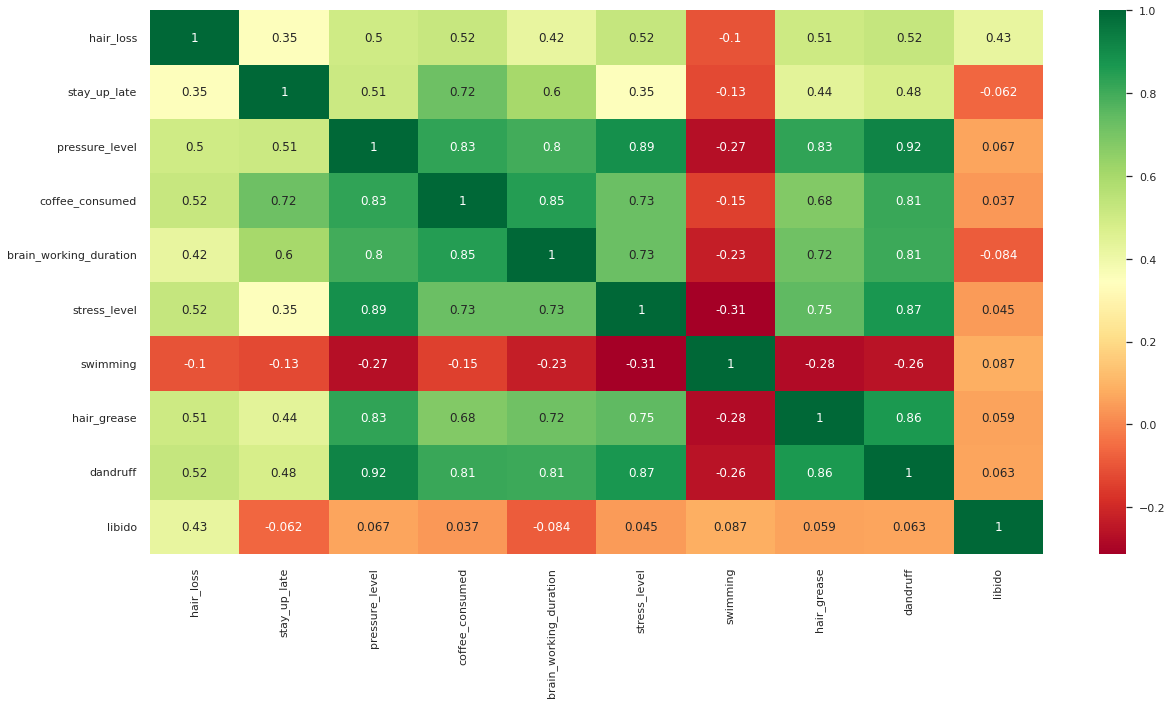

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(imputed_data.corr(), annot=True, cmap='RdYlGn', )

Correlation matrix and heatmap shows that there is multicollinearity between the independent variables. Highest correlation is between Pressure Level and Dandruff.



# **Correlation Analysis Using pairplot**

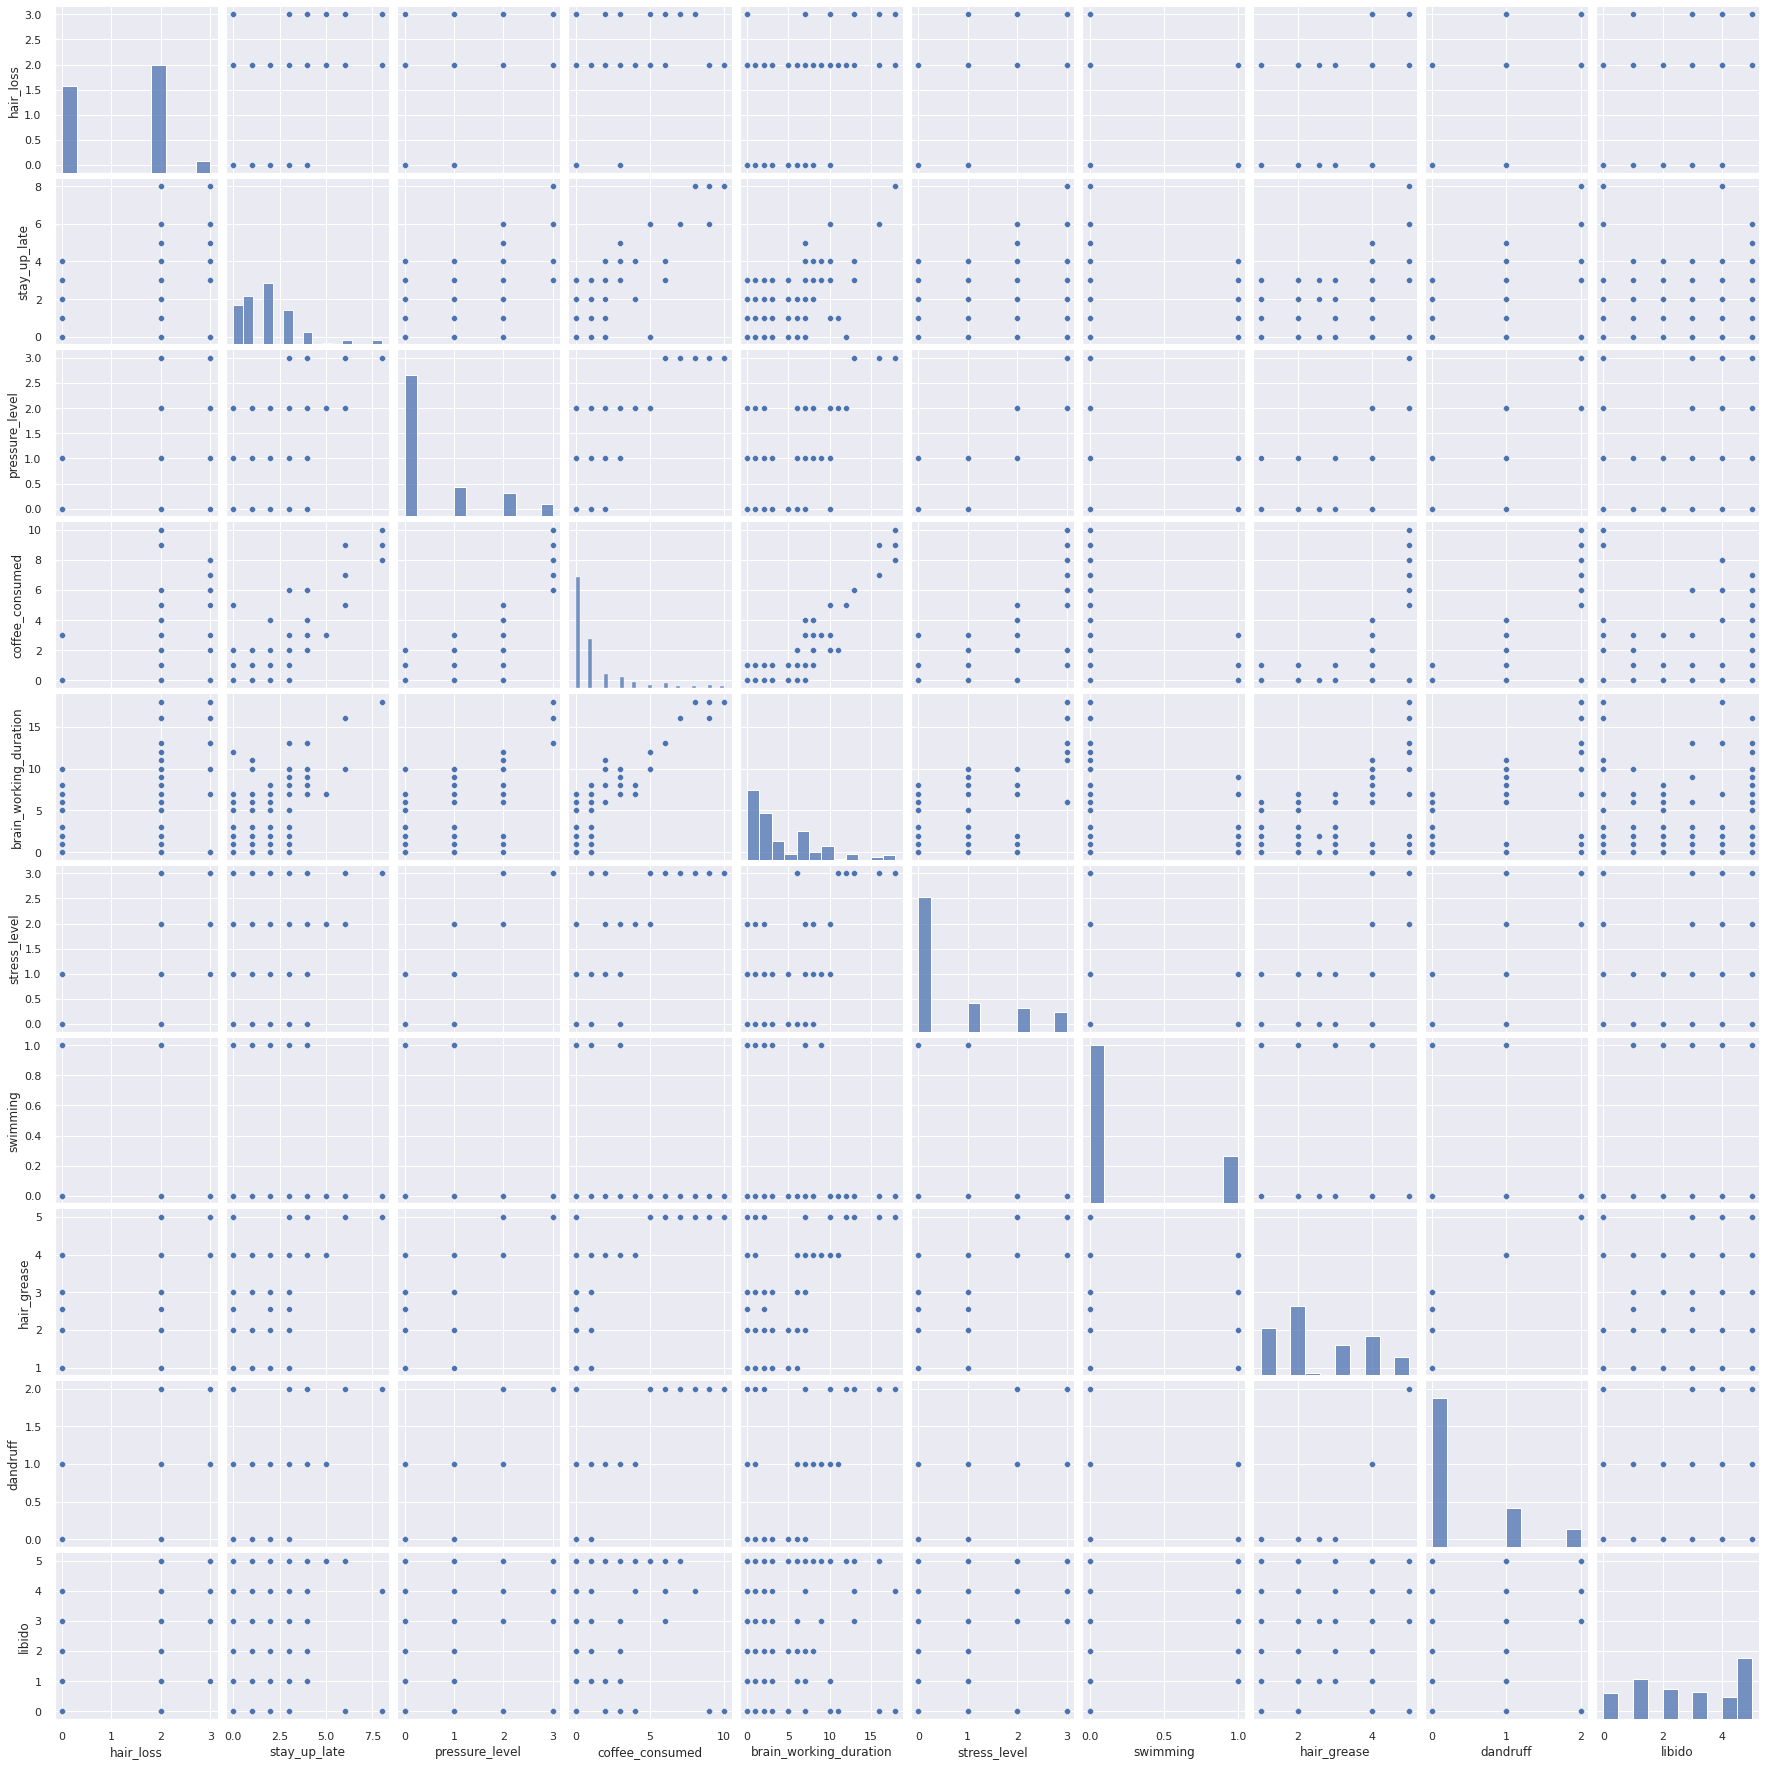

In [ ]:
sns.pairplot(imputed_data) 

**The variables are not independent of each other. There is multi - collinearity among lot of the independent variable which is shown by the correlation table and pairplot map**


In [ ]:
corr_matrix = imputed_data.corr()
corr_coefs = corr_matrix['hair_loss']                 #correlation against target variable
sorted_corr_coefs = corr_coefs.sort_values(ascending=False)
print(sorted_corr_coefs)
 

hair_loss                 1.000000
stress_level              0.524020
dandruff                  0.523293
coffee_consumed           0.518949
hair_grease               0.505263
pressure_level            0.497609
libido                    0.425367
brain_working_duration    0.420956
stay_up_late              0.349901
swimming                 -0.103581
Name: hair_loss, dtype: float64






1. Dandruff , Stress Level , Pressure Level , Hair Grease, Coffee Consumed are the top five independent variables that have strong correlation with Hair Loss

 
2. Predictor significance can be identified by the correlation analysis and also other two methods called variance importance and model selection





In [ ]:
#References:- https://towardsdatascience.com/how-to-split-a-dataset-into-training-and-testing-sets-b146b1649830
# training_data = imputed_data.sample(frac=0.8, random_state=25)
# testing_data = imputed_data.drop(training_data.index)

# print(f"No. of training examples: {training_data.shape[0]}")
# print(f"No. of testing examples: {testing_data.shape[0]}")

# **Converted Pandas Dataframe to H2O dataframe to proceed with AutoML**

In [ ]:
df = h2o.H2OFrame(imputed_data)  

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.types

{'hair_loss': 'int',
 'stay_up_late': 'int',
 'pressure_level': 'int',
 'coffee_consumed': 'int',
 'brain_working_duration': 'int',
 'school_assesssment': 'enum',
 'stress_level': 'int',
 'shampoo_brand': 'enum',
 'swimming': 'int',
 'hair_washing': 'enum',
 'hair_grease': 'real',
 'dandruff': 'int',
 'libido': 'int'}

In [ ]:
df.shape

(400, 13)

In [ ]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(326, 13)
(74, 13)


In [ ]:
X = df.columns
print(X)

['hair_loss', 'stay_up_late', 'pressure_level', 'coffee_consumed', 'brain_working_duration', 'school_assesssment', 'stress_level', 'shampoo_brand', 'swimming', 'hair_washing', 'hair_grease', 'dandruff', 'libido']


In [ ]:
y_numeric ='hair_loss'
X.remove(y_numeric) 
print(X)

['stay_up_late', 'pressure_level', 'coffee_consumed', 'brain_working_duration', 'school_assesssment', 'stress_level', 'shampoo_brand', 'swimming', 'hair_washing', 'hair_grease', 'dandruff', 'libido']


In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


We can see above that the best model, is slighly overfitting on the dataset as there is a significant difference between the metrics on training and validation dataset



1. Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted and actual values. It is calculated by taking the average of the squared differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

2. Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models. The RMSE is a measure of how well the model is able to predict the actual values.

3. Mean Absolute Error (MAE): The MAE measures the average absolute difference between the predicted and actual values. It is calculated by taking the average of the absolute differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

4. Root Mean Squared Logarithmic Error (RMSLE): The RMSLE is a variation of the RMSE that is used for regression models where the target variable has a wide range of values. It is calculated by taking the square root of the average of the squared differences between the logarithm of the predicted and actual values.

5. Mean Residual Deviance: The Mean Residual Deviance is a measure of the goodness of fit for a regression model. It measures the average difference between the predicted and actual values, normalized by the degrees of freedom of the model.

6. R-squared (R^2): The R-squared is a measure of how well the model fits the data. It is the proportion of the variance in the dependent variable that is explained by the independent variables. A value of 1 means that the model explains all the variability in the data, while a value of 0 means that the model explains none of the variability.

7. K-fold cross-validation: It is used to validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split.

8. Mean absolute percentage error: MAPE is the average absolute percentage difference between the labels and the predicted values. This metric ranges between zero and infinity; a lower value indicates a higher quality model.





In [ ]:
print(aml.leaderboard)

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20230228_181111  0.331636  0.109982  0.144519  0.167116                  0.109982
GBM_grid_1_AutoML_1_20230228_181111_model_47             0.333075  0.110939  0.129618  0.167268                  0.110939
GBM_grid_1_AutoML_1_20230228_181111_model_76             0.334921  0.112172  0.169293  0.175536                  0.112172
StackedEnsemble_BestOfFamily_3_AutoML_1_20230228_181111  0.341104  0.116352  0.169068  0.172897                  0.116352
GBM_5_AutoML_1_20230228_181111                           0.341947  0.116928  0.165163  0.173353                  0.116928
StackedEnsemble_AllModels_2_AutoML_1_20230228_181111     0.343673  0.118111  0.169964  0.175088                  0.118111
GBM_grid_1_AutoML_1_20230228_181111_model_87             0.349588  0.122212  0.132086  0.176498                  0.122212
XGBoost_grid_1_AutoML_1_

The models in the leaderboard are ordered according to their RMSE scores, where a smaller score indicates better performance. The top row of the leaderboard shows the highest-performing model with the lowest RMSE score. By analyzing the evaluation metrics, different models can be compared and the most suitable model can be chosen for the specific use case.

<br>

In this leaderboard, the best performing model is


*   StackedEnsemble_BestOfFamily_4_AutoML_1_20230228_181111 with an rmse score of 0.331636.
*   The second-best model is GBM_grid_1_AutoML_1_20230228_181111_model_47 with an rmse score of 0.333075.






In [ ]:
# Convert the H2O leaderboard to a pandas DataFrame
dff = aml.leaderboard.as_data_frame()
df_sorted1 = dff.sort_values(by='rmse', ascending='False')
# Print the top row of the sorted DataFrame
print(df_sorted1.head(1))

                                            model_id      rmse       mse  \
0  StackedEnsemble_BestOfFamily_4_AutoML_1_202302...  0.331636  0.109982   

        mae     rmsle  mean_residual_deviance  
0  0.144519  0.167116                0.109982  


# **Variance Inflation Factor (VIF)**

VIF, or Variance Inflation Factor, is a measure used to detect multicollinearity among a set of independent variables. 

<br>

Swimming is the least significant and dandruff,hair grease, and pressure level have high VIF which high collinearity




In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF

multi_col_values = imputed_data[['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level',
       'libido', 'brain_working_duration', 'stay_up_late', 'swimming']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = multi_col_values.columns
vif["VIF"] = [variance_inflation_factor(multi_col_values.values, i) for i in range(multi_col_values.shape[1])]
vif

,variables,VIF
0,stress_level,7.818234
1,dandruff,11.512201
2,coffee_consumed,9.430122
3,hair_grease,10.680688
4,pressure_level,13.097851
5,libido,3.047431
6,brain_working_duration,8.351337
7,stay_up_late,5.519876
8,swimming,1.420789


# **OLS:-**
Ordinary least squares (OLS) regression is a statistical method of analysis used for multivariate model that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable.

In [ ]:
import statsmodels.api as sm

model = sm.OLS(imputed_data['hair_loss'], imputed_data[ ['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level',
       'libido', 'brain_working_duration', 'stay_up_late', 'swimming']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              hair_loss   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              161.0
Date:                Tue, 28 Feb 2023   Prob (F-statistic):                   1.34e-125
Time:                        18:56:38   Log-Likelihood:                         -447.80
No. Observations:                 400   AIC:                                      913.6
Df Residuals:                     391   BIC:                                      949.5
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
stress_level               0.4601      0.087      5.276      0.000       0.289       0.631
dandruff                   0.2065      0.173      1.193      0.234      -0.134       0.547
coffee_consumed            0.1741      0.050      3.468      0.001       0.075       0.273
hair_grease                0.1205      0.043      2.816      0.005       0.036       0.205
pressure_level            -0.4612      0.129     -3.582      0.000      -0.714      -0.208
libido                     0.2124      0.020     10.807      0.000       0.174       0.251
brain_working_duration    -0.0308      0.019     -1.646      0.101      -0.068       0.006
stay_up_late               0.0703      0.035      1.994      0.047       0.001       0.140
swimming                  -0.0278      0.093     -0.300      0.764      -0.210       0.154
==============================================================================
Omnibus:                       88.081   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.943
Skew:                           0.198   Prob(JB):                     4.67e-05
Kurtosis:                       1.981   Cond. No.                         37.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the OLS summary, the p-values for 'Swimming' and 'Dandruff' are above 0.05, which implies that these variables may not have a significant impact on hair loss prediction. However, 'Dandruff' is considered an important factor, and thus it cannot be dropped from the model. To obtain a model with all variables having p-values less than 0.05, the other independent variables can be dropped. The resulting model has an accuracy of 78.7%. The next step would be to evaluate the VIF and p-values for the remaining independent variables.




Swimming seems to be the least significant as it has the highest p value and Stress Level, Pressure Level and Libido has the lowest p value so they are the most significant



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF

multi_col_values = imputed_data[['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level',
       'libido', 'stay_up_late' ]]

#we cannot remove dandruff as it is an important aspect for hair loss
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = multi_col_values.columns
vif["VIF"] = [variance_inflation_factor(multi_col_values.values, i) for i in range(multi_col_values.shape[1])]
vif

,variables,VIF
0,stress_level,7.818234
1,dandruff,11.512201
2,coffee_consumed,9.430122
3,hair_grease,10.680688
4,pressure_level,13.097851
5,libido,3.047431
6,brain_working_duration,8.351337
7,stay_up_late,5.519876
8,swimming,1.420789


VIF for all except three variables are less than 10. Dropping either of the two variables 'dandruff' or 'hair_grease', 'pressure_level	' wont make sense as they are important factors hair loss .



In [ ]:
import statsmodels.api as sm

model = sm.OLS(imputed_data['hair_loss'], imputed_data[ ['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level',
       'libido', 'brain_working_duration', 'stay_up_late']]).fit()
# Removing Swimming is not affecting accuracy
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              hair_loss   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              181.5
Date:                Tue, 28 Feb 2023   Prob (F-statistic):                   1.01e-126
Time:                        19:10:53   Log-Likelihood:                         -447.85
No. Observations:                 400   AIC:                                      911.7
Df Residuals:                     392   BIC:                                      943.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
stress_level               0.4631      0.086      5.354      0.000       0.293       0.633
dandruff                   0.2113      0.172      1.228      0.220      -0.127       0.550
coffee_consumed            0.1719      0.050      3.466      0.001       0.074       0.269
hair_grease                0.1182      0.042      2.812      0.005       0.036       0.201
pressure_level            -0.4579      0.128     -3.573      0.000      -0.710      -0.206
libido                     0.2111      0.019     11.021      0.000       0.173       0.249
brain_working_duration    -0.0308      0.019     -1.647      0.100      -0.068       0.006
stay_up_late               0.0708      0.035      2.013      0.045       0.002       0.140
==============================================================================
Omnibus:                       91.274   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.276
Skew:                           0.202   Prob(JB):                     3.96e-05
Kurtosis:                       1.973   Cond. No.                         37.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-values for all the variables are less than 0.05 and the accuracy is 78.7%. It is unaffected even after removing Swimming tells us that these two variables were not important for calculating 'hair loss'.



# **H20 Re-Execution  on new model**

In [ ]:
#Dropping the unecessary features
imputed_data1=imputed_data.drop(['swimming'], axis=1)
imputed_data1

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,hair_grease,dandruff,libido
0,0,2,0,0,1,0,3.0,0,1
1,0,0,0,0,3,0,1.0,0,1
2,2,3,0,1,0,0,2.0,0,2
3,0,2,0,0,1,0,3.0,0,3
4,0,2,0,0,1,0,1.0,0,2
...,...,...,...,...,...,...,...,...,...
395,2,1,0,1,2,0,1.0,0,5
396,0,1,0,0,3,0,2.0,0,1
397,2,1,0,1,1,0,2.0,0,5
398,2,0,0,1,1,0,2.0,0,5


In [ ]:
#Calculating correlation matrix for all variables
imputed_data1.corr()

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,hair_grease,dandruff,libido
hair_loss,1.000000,0.349901,0.497609,0.518949,0.420956,0.524020,0.505263,0.523293,0.425367
stay_up_late,0.349901,1.000000,0.508844,0.718017,0.603039,0.352284,0.439185,0.477551,-0.061987
pressure_level,0.497609,0.508844,1.000000,0.826228,0.797197,0.889836,0.829852,0.919271,0.066658
coffee_consumed,0.518949,0.718017,0.826228,1.000000,0.847582,0.725233,0.680236,0.811721,0.036706
brain_working_duration,0.420956,0.603039,0.797197,0.847582,1.000000,0.726903,0.717837,0.809451,-0.083707
stress_level,0.524020,0.352284,0.889836,0.725233,0.726903,1.000000,0.747642,0.868707,0.045168
hair_grease,0.505263,0.439185,0.829852,0.680236,0.717837,0.747642,1.000000,0.863648,0.059235
dandruff,0.523293,0.477551,0.919271,0.811721,0.809451,0.868707,0.863648,1.000000,0.062513
libido,0.425367,-0.061987,0.066658,0.036706,-0.083707,0.045168,0.059235,0.062513,1.000000


Text(0.5, 1.0, 'Feature Correlation')

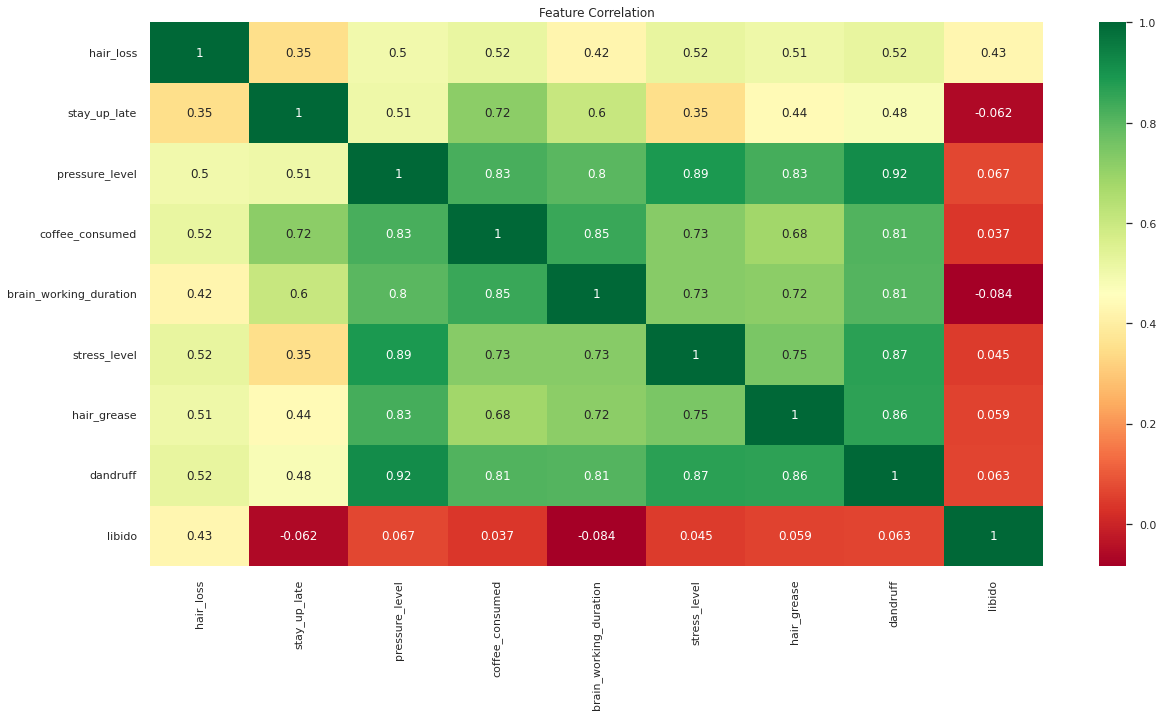

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(imputed_data1.corr(), annot=True, cmap='RdYlGn')
plt.title('Feature Correlation')

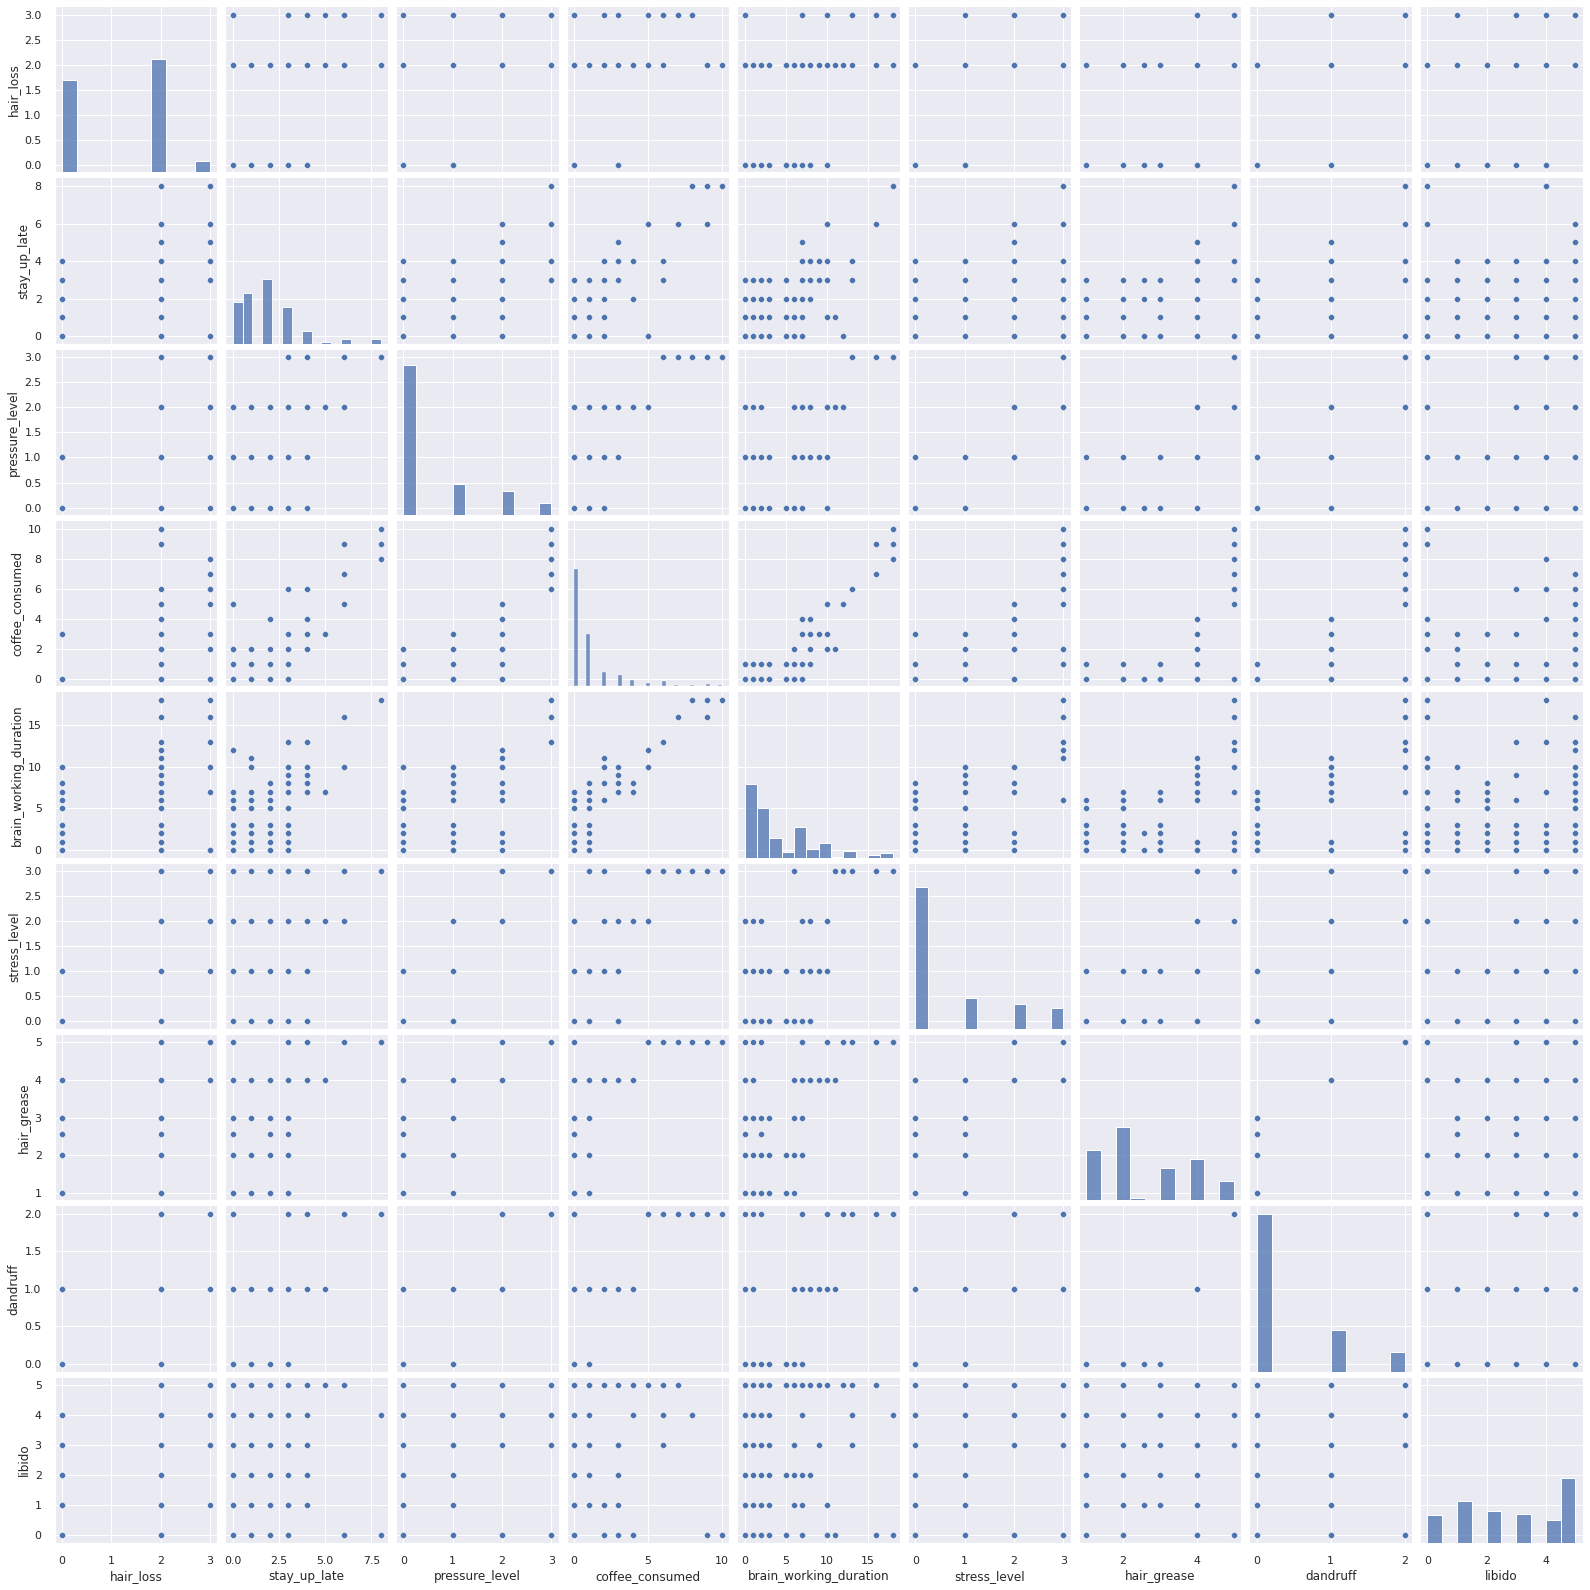

In [ ]:
sns.pairplot(imputed_data1)


In [ ]:
df1 = h2o.H2OFrame(imputed_data)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML
df1=df1.drop(['swimming','school_assesssment','shampoo_brand','hair_washing'])
df1

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,hair_grease,dandruff,libido
0,2,0,0,1,0,3,0,1
0,0,0,0,3,0,1,0,1
2,3,0,1,0,0,2,0,2
0,2,0,0,1,0,3,0,3
0,2,0,0,1,0,1,0,2
0,0,0,0,3,0,1,0,3
2,3,0,1,1,0,2,0,3
0,0,0,0,1,0,3,0,3
0,2,0,0,2,0,2,0,4
2,1,0,1,2,0,1,0,5


In [ ]:
df1_train, df1_test = df1.split_frame([pct_rows])

In [ ]:
X1=df2.columns
print(X1)

['hair_loss', 'stay_up_late', 'pressure_level', 'coffee_consumed', 'brain_working_duration', 'stress_level', 'hair_grease', 'dandruff', 'libido']


In [ ]:
#Seperate Dependent variable from Independent variable
y1_numeric ='hair_loss'
X1.remove(y1_numeric) 
print(X1)

['stay_up_late', 'pressure_level', 'coffee_consumed', 'brain_working_duration', 'stress_level', 'hair_grease', 'dandruff', 'libido']


In [ ]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml1.train(x=X1,y=y1_numeric,training_frame=df1_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_5_20230228_203014


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    46                 46                          25166                  6            6            6             25            47            38.8478

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.03674218444423924
RMSE: 0.19168250948962257
MAE: 0.07467164672044123
RMSLE: 0.10095350946580114
Mean Residual Deviance: 0.03674218444423924

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.122376854838179
RMSE: 0.3498240341059759
MAE: 0.15445997419464808
RMSLE: 0.18819671648721095
Mean Residual Deviance: 0.122376854838179

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.15058   0.0357113  0.159779      0.102204      0.169021      0.193515      0.12838
mean_residual_deviance  0.1248    0.0464544  0.113386      0.0582007     0.163631      0.174315      0.114467
mse                     0.1248    0.0464544  0.113386      0.0582007     0.163631      0.174315      0.114467
r2                      0.88847   0.0387267  0.893828      0.944692      0.853405      0.850431      0.899995
residual_deviance       0.1248    0.0464544  0.113386      0.0582007     0.163631      0.174315      0.114467
rmse                    0.347666  0.0700738  0.336729      0.241248      0.404514      0.41751       0.33833
rmsle                   0.188344  0.0381636  0.198634      0.139316      0.212697      0.231729      0.159347

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-02-28 20:30:20  0.380 sec   0                  1.05407          1.02224         1.11107
    2023-02-28 20:30:20  0.388 sec   5                  0.675027         0.646388        0.455662
    2023-02-28 20:30:20  0.395 sec   10                 0.457533         0.416349        0.209337
    2023-02-28 20:30:20  0.403 sec   15                 0.338186         0.279051        0.11437
    2023-02-28 20:30:20  0.410 sec   20                 0.281536         0.206319        0.0792623
    2023-02-28 20:30:20  0.417 sec   25                 0.249665         0.157863        0.0623325
    2023-02-28 20:30:20  0.425 sec   30                 0.229009         0.122589        0.0524452
    2023-02-28 20:30:20  0.432 sec   35                 0.210347         0.100333        0.0442458
    2023-02-28 20:30:20  0.440 sec   40                 0.199618         0.0857331       0.0398475
    2023-02-28 20:30:20  0.447 sec   45                 0.192181         0.0758279       0.0369336
    2023-02-28 20:30:20  0.449 sec   46                 0.191683         0.0746716       0.0367422

Variable Importances: 
variable                relative_importance    scaled_importance    percentage
----------------------  ---------------------  -------------------  ------------
coffee_consumed         532.138                1                    0.317487
libido                  500.975                0.941438             0.298894
stay_up_late            160.356                0.301342             0.0956722
hair_grease             156.82                 0.294697             0.0935625
stress_level            150.978                0.283719             0.0900771
brain_working_duration  82.0408                0.154172

In [ ]:
print(aml1.leaderboard)

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
GBM_5_AutoML_5_20230228_203014                           0.349824  0.122377  0.15446   0.188197                  0.122377
StackedEnsemble_AllModels_2_AutoML_5_20230228_203014     0.352883  0.124527  0.165436  0.188952                  0.124527
StackedEnsemble_BestOfFamily_3_AutoML_5_20230228_203014  0.353431  0.124914  0.160339  0.189696                  0.124914
GBM_grid_1_AutoML_5_20230228_203014_model_89             0.353595  0.125029  0.154784  0.185417                  0.125029
GBM_grid_1_AutoML_5_20230228_203014_model_74             0.35489   0.125947  0.170274  0.187858                  0.125947
StackedEnsemble_BestOfFamily_4_AutoML_5_20230228_203014  0.35548   0.126366  0.161819  0.190672                  0.126366
GBM_grid_1_AutoML_5_20230228_203014_model_102            0.362735  0.131577  0.189698  0.203504                  0.131577
GBM_grid_1_AutoML_5_2023

In [ ]:
#Assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict
     

{'GBM_5_AutoML_5_20230228_203014': 0, 'GLM_1_AutoML_5_20230228_203014': 284}

In [ ]:
#print the index value of best model
print(model_index)
best_model = h2o.get_model(aml1.leaderboard[model_index,'model_id'])
     

0


In [ ]:
best_model.algo

'gbm'

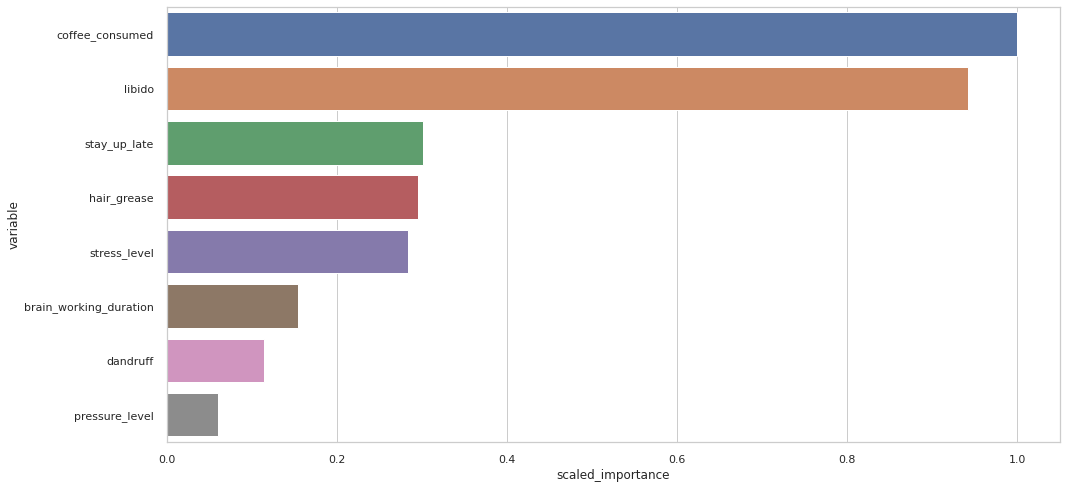

In [ ]:
#plot variables in order of their importance for price prediction
variable_importances = best_model.varimp(use_pandas=True)

# Plot variable importances using seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.barplot(x="scaled_importance", y="variable", data=variable_importances)
plt.show()

284
glm


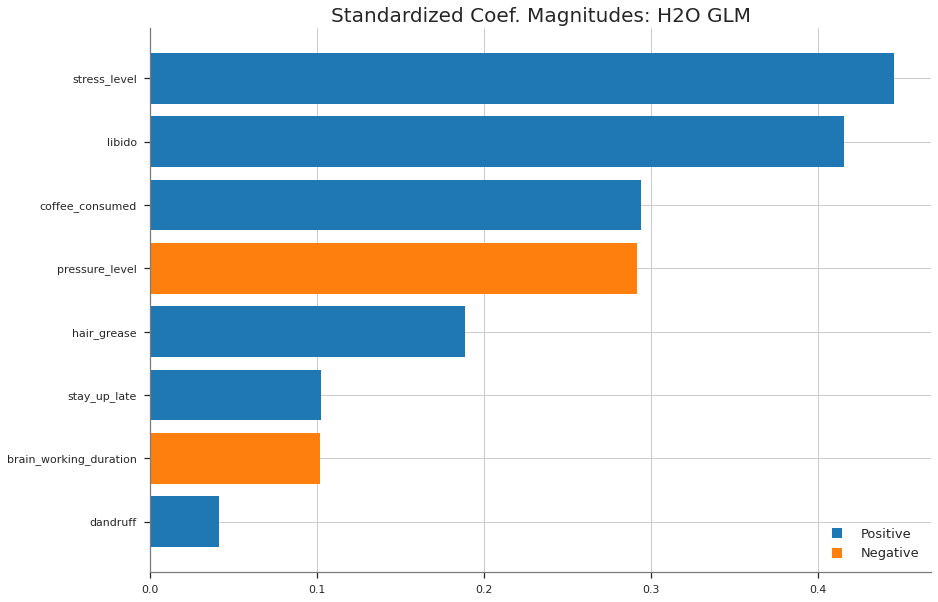

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo) 
  glm_model1.std_coef_plot()

From the above results, we observe that Stress Level, Libido, Coffee 

---



---

Consumed, Pressure Level, Hair Grease are 
some of the important features.



#**Checking if assumptions violated**
Checking if the model has violated any assumptions. For linear regression some of the assumptions are:

(1)There needs to be linear relation between the independent and dependent variable.

(2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.

(3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.

(4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.


In [ ]:
#Seperating the predictor and target variables
A=imputed_data1.drop(['hair_loss'],axis=1)
B=imputed_data1['hair_loss']

In [ ]:
#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

In [ ]:
cols1 = [ 'stay_up_late', 'pressure_level', 'coffee_consumed', 'stress_level', 'hair_grease', 'dandruff', 'libido']
model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()

In [ ]:
b_pred = model1.predict(sm.add_constant(A_train[cols1]))
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.9151347174783951e-16


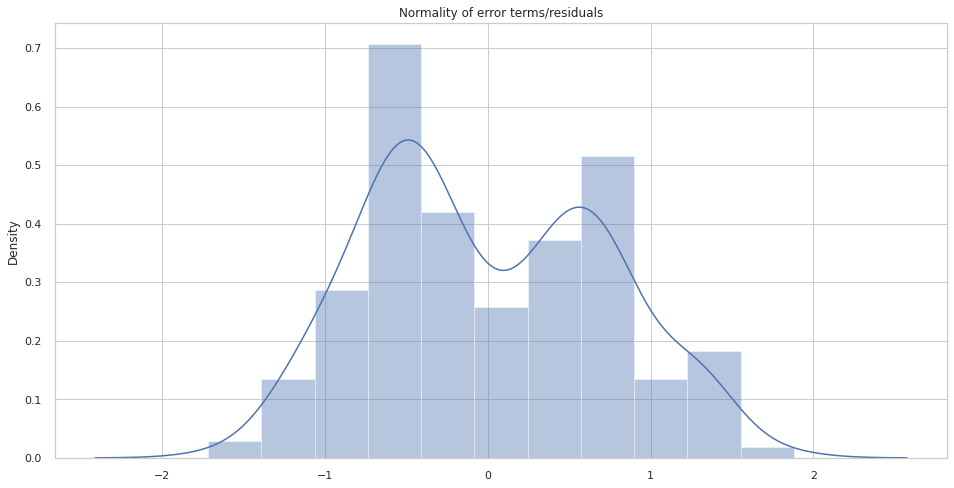

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

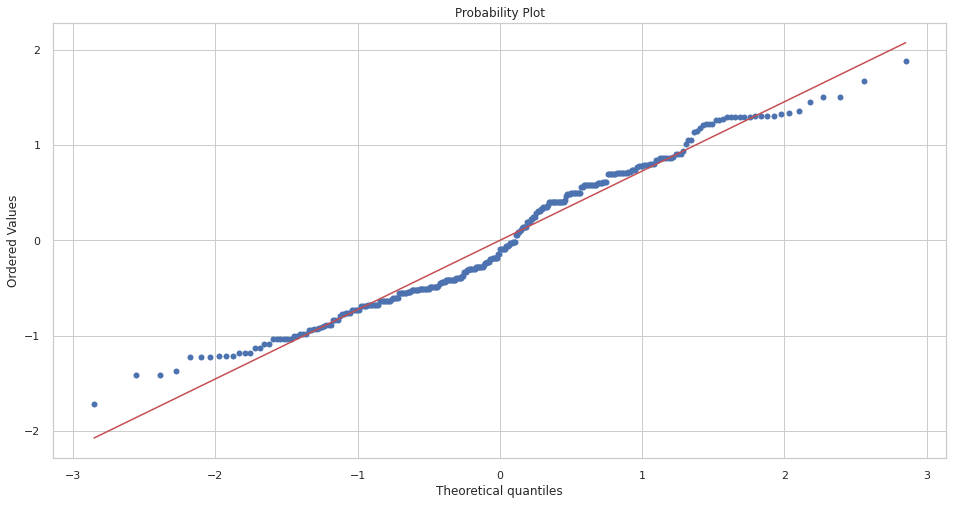

In [ ]:
import pylab 
import scipy.stats as stats   
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<AxesSubplot:xlabel='hair_loss', ylabel='Count'>

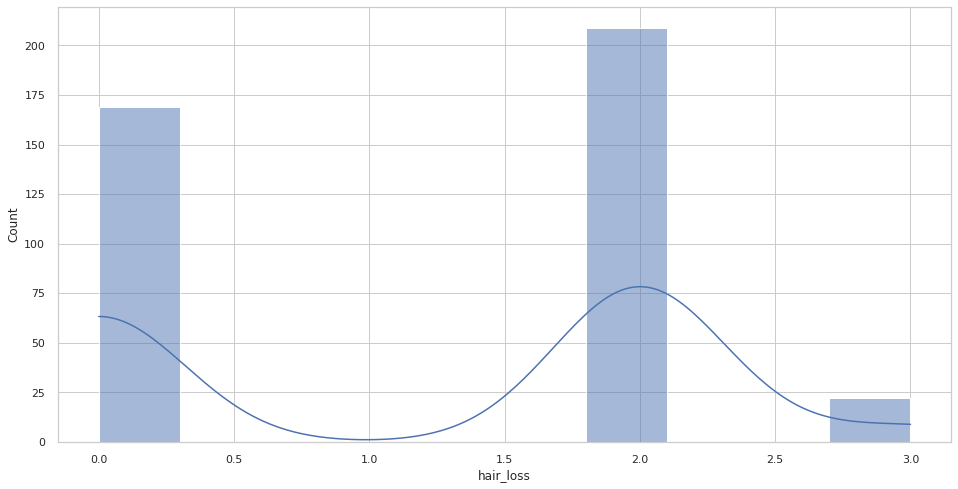

In [ ]:
sns.histplot(imputed_data.hair_loss, kde = True)

**Ideally for the scatterplot the result should be scattered and it should not 

have any particular pattern.When the same is plotted as distplot it should follow a bell curve pattern.Both the plots give the expected result so even this assumptions are satisfied.**




# **Regularization in H20**
We use H2OGeneralizedLinearEstimator which would enable us to fit a generalized linear model, specified by a response variable, a set of predictors and a description of the error distribution.



In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
hair_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
hair_glm_regularization_ridge = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)
hair_glm_regularization_lasso = H2OGeneralizedLinearEstimator(family='gaussian', lambda_=0.001, alpha=1.0)
hair_glm_regularization_elasticnet = H2OGeneralizedLinearEstimator(family="gaussian", alpha=0.5, lambda_=0.01)

In [ ]:
#Model details without regularization
hair_glm.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677606245488_133


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              8                             8                              1                       py_33_sid_8d72

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.5503866841190796
RMSE: 0.741880505283081
MAE: 0.6465427854542394
RMSLE: 0.4074208090124295
Mean Residual Deviance: 0.5503866841190796
R^2: 0.5046333397574585
Null degrees of freedom: 325
Residual degrees of freedom: 317
Null deviance: 362.2085889570547
Residual deviance: 179.42605902281997
AIC: 750.4821790938828

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  ------------------  ------------------
    2023-02-28 21:34:34  0.000 sec   0             362.2085889570547          1.111069291279309
    2023-02-28 21:34:34  0.006 sec   1                                                           0.741880505283081  0.5503866841190796   0.6465427854542394  0.5046333397574585

Variable Importances: 
variable                relative_importance    scaled_importance    percentage
----------------------  ---------------------  -------------------  ------------
stress_level            0.506795               1                    0.237288
libido                  0.421577               0.831849             0.197388
pressure_level          0.388955               0.76748              0.182114
coffee_consumed         0.336242               0.663468             0.157433
hair_grease             0.218307               0.430761             0.102215
brain_working_duration  0.123986               0.244648             0.0580521
stay_up_late            0.10452                0.206237             0.0489378
dandruff                0.0353934              0.0698377            0.0165717

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.




# **Ridge Regularization**

In [ ]:
hair_glm_regularization_ridge.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677606245488_134


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  8                             8                              1                       py_33_sid_8d72

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.5503933368039102
RMSE: 0.7418849889328603
MAE: 0.646961779183024
RMSLE: 0.40752249021122494
Mean Residual Deviance: 0.5503933368039102
R^2: 0.5046273521157489
Null degrees of freedom: 325
Residual degrees of freedom: 317
Null deviance: 362.2085889570547
Residual deviance: 179.42822779807474
AIC: 750.4861195274183

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  -----------------  ------------------
    2023-02-28 21:34:38  0.000 sec   0             362.2085889570547          1.111069291279309
    2023-02-28 21:34:38  0.006 sec   1                                                           0.7418849889328603  0.5503933368039102   0.646961779183024  0.5046273521157489

Variable Importances: 
variable                relative_importance    scaled_importance    percentage
----------------------  ---------------------  -------------------  ------------
stress_level            0.502512               1                    0.237311
libido                  0.421222               0.838232             0.198921
pressure_level          0.381917               0.760015             0.18036
coffee_consumed         0.333213               0.663095             0.15736
hair_grease             0.216189               0.430216             0.102095
brain_working_duration  0.122423               0.243621             0.057814
stay_up_late            0.104384               0.207725             0.0492953
dandruff                0.035669               0.0709814            0.0168446

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# **Lasso Regularization**

In [ ]:
hair_glm_regularization_lasso.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677606245488_135


GLM Model: summary
    family    link      regularization           number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -----------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 0.001 )  8                             8                              1                       py_33_sid_8d72

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.5504513399181998
RMSE: 0.7419240796187976
MAE: 0.6477701706793023
RMSLE: 0.4076894720394214
Mean Residual Deviance: 0.5504513399181998
R^2: 0.5045751473480131
Null degrees of freedom: 325
Residual degrees of freedom: 317
Null deviance: 362.2085889570547
Residual deviance: 179.44713681333315
AIC: 750.5204731754409

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  ------------------
    2023-02-28 21:35:30  0.000 sec   0             362.2085889570547          1.111069291279309
    2023-02-28 21:35:30  0.009 sec   1                                                           0.7419240796187976  0.5504513399181998   0.6477701706793023  0.5045751473480131

Variable Importances: 
variable                relative_importance    scaled_importance    percentage
----------------------  ---------------------  -------------------  ------------
stress_level            0.497966               1                    0.240385
libido                  0.421413               0.846269             0.20343
pressure_level          0.367163               0.737325             0.177242
coffee_consumed         0.32787                0.658418             0.158274
hair_grease             0.213647               0.429039             0.103135
brain_working_duration  0.114796               0.23053              0.0554159
stay_up_late            0.102424               0.205684             0.0494433
dandruff                0.0262563              0.0527271            0.0126748

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.


# **Elastic Net Regularization**

In [ ]:
hair_glm_regularization_elasticnet.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677606245488_136


GLM Model: summary
    family    link      regularization                             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -----------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.01 )  8                             7                              1                       py_33_sid_8d72

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.5527332476126087
RMSE: 0.7434603201332326
MAE: 0.6551622584714656
RMSLE: 0.4098702626426957
Mean Residual Deviance: 0.5527332476126087
R^2: 0.5025213531226491
Null degrees of freedom: 325
Residual degrees of freedom: 318
Null deviance: 362.2085889570547
Residual deviance: 180.1910387217104
AIC: 749.8691195900782

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  ------------------
    2023-02-28 21:54:59  0.000 sec   0             362.2085889570547          1.111069291279309
    2023-02-28 21:54:59  0.004 sec   1                                                           0.7434603201332326  0.5527332476126087   0.6551622584714656  0.5025213531226491

Variable Importances: 
variable                relative_importance    scaled_importance    percentage
----------------------  ---------------------  -------------------  ------------
stress_level            0.444024               1                    0.253361
libido                  0.418666               0.942889             0.238891
coffee_consumed         0.281991               0.63508              0.160905
pressure_level          0.256067               0.576695             0.146112
hair_grease             0.184317               0.415106             0.105172
stay_up_late            0.0939753              0.211645             0.0536225
brain_working_duration  0.0734954              0.165521             0.0419366
dandruff                0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

From the above results, the accuracy and other related variables were different for all the cases when dataset was regularized . The non regularized dataset was better than the other methods. This tells that for this specific model regularization does not help.



# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_5_20230228_203014_model_188,0.19648,0.0386043,0.0743346,0.0720155,0.0386043,60,0.017841,GBM
XGBoost_grid_1_AutoML_5_20230228_203014_model_3,0.197091,0.0388448,0.0993628,0.0863656,0.0388448,56,0.012507,XGBoost
GBM_5_AutoML_5_20230228_203014,0.209554,0.043913,0.0837472,0.0804847,0.043913,70,0.014303,GBM
GBM_grid_1_AutoML_5_20230228_203014_model_58,0.213173,0.0454427,0.0782749,0.0803123,0.0454427,81,0.019196,GBM
StackedEnsemble_BestOfFamily_3_AutoML_5_20230228_203014,0.217209,0.0471799,0.0857628,0.0833673,0.0471799,115,0.050838,StackedEnsemble
GBM_grid_1_AutoML_5_20230228_203014_model_87,0.217711,0.0473982,0.0691739,0.0835698,0.0473982,74,0.018614,GBM
StackedEnsemble_BestOfFamily_4_AutoML_5_20230228_203014,0.220054,0.0484239,0.0963702,0.0849782,0.0484239,120,0.064259,StackedEnsemble
GBM_grid_1_AutoML_5_20230228_203014_model_40,0.227747,0.0518689,0.101218,0.10627,0.0518689,70,0.019438,GBM
GBM_grid_1_AutoML_5_20230228_203014_model_47,0.228357,0.052147,0.0757738,0.091588,0.052147,120,0.012091,GBM
StackedEnsemble_AllModels_2_AutoML_5_20230228_203014,0.229465,0.0526542,0.0999815,0.0897555,0.0526542,116,0.078404,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

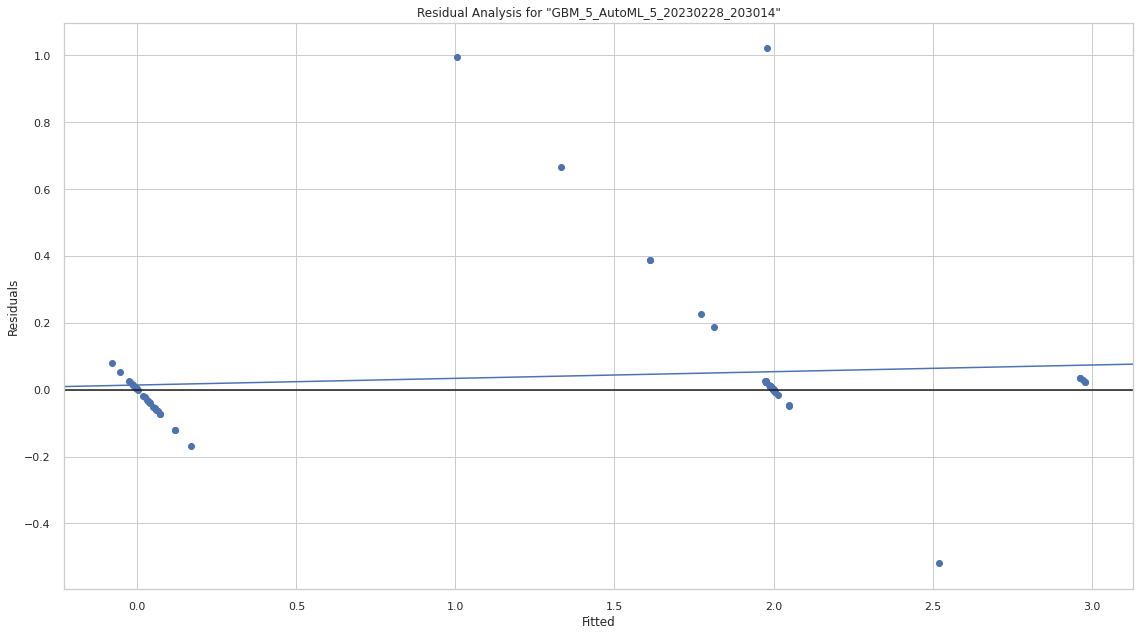

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

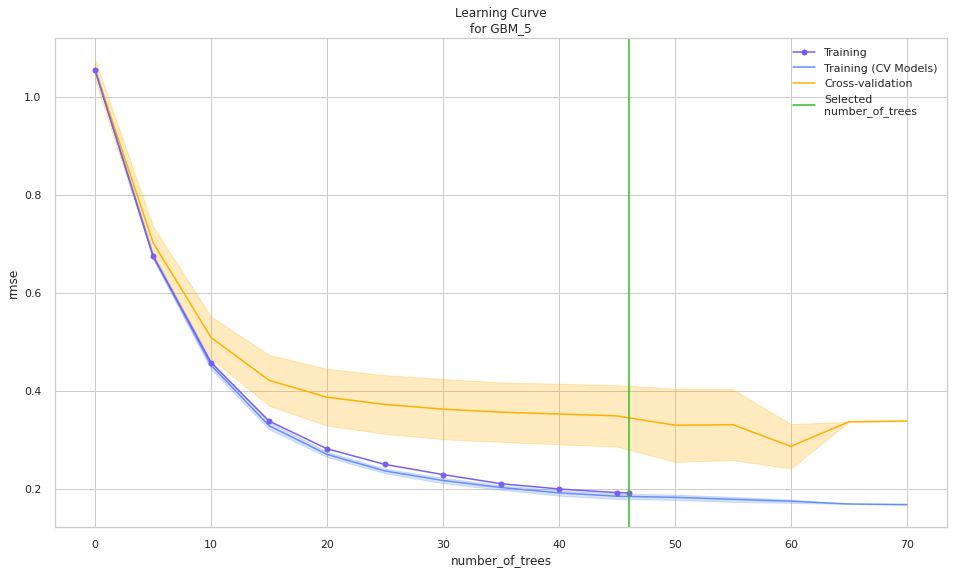

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

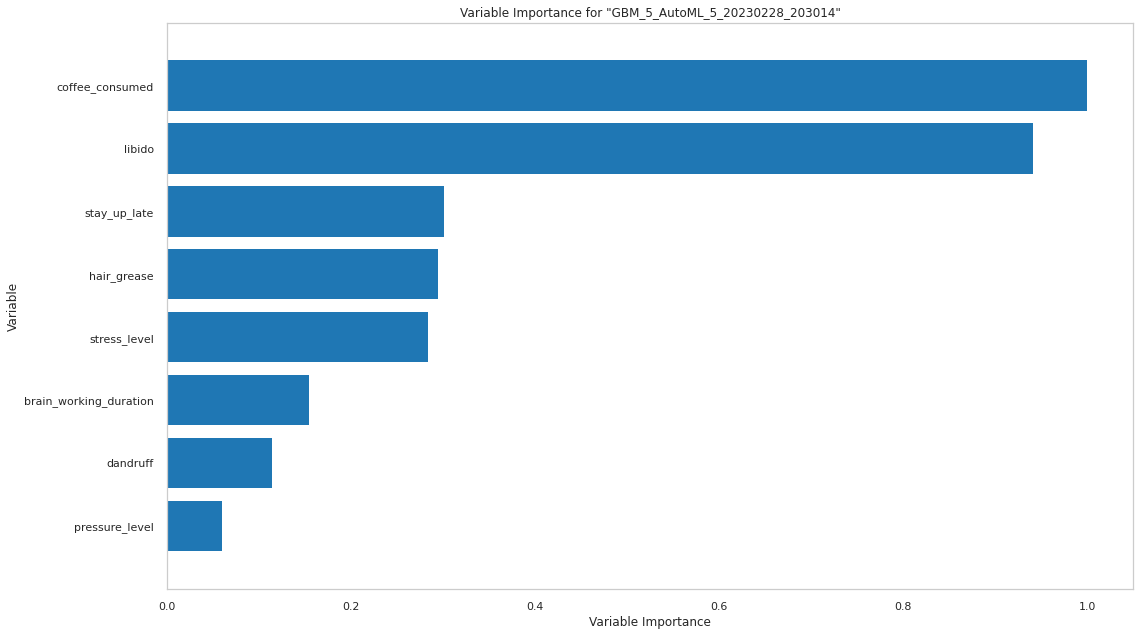

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

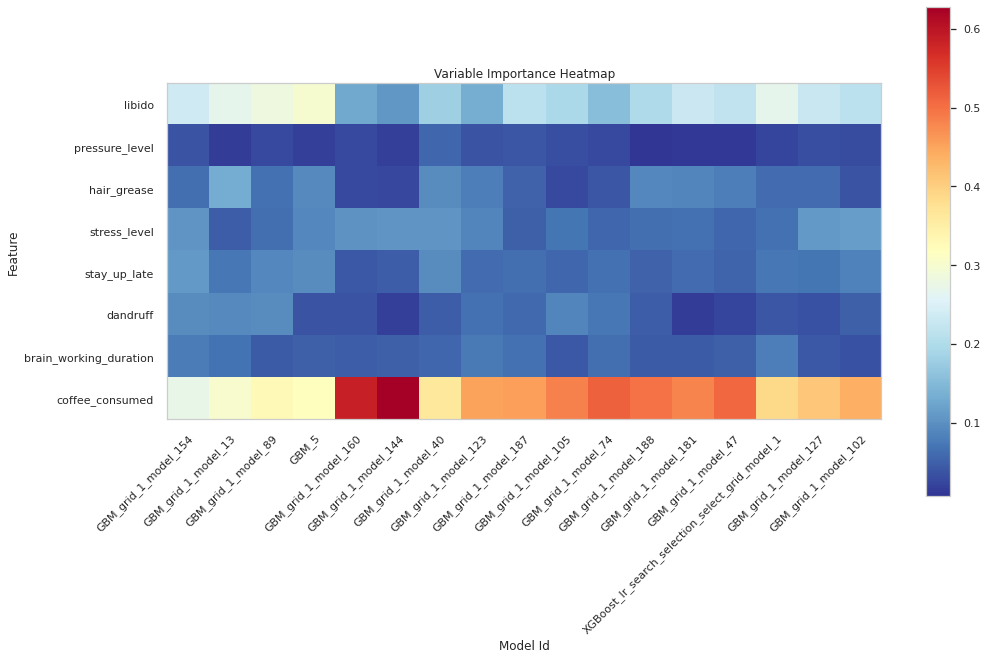

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

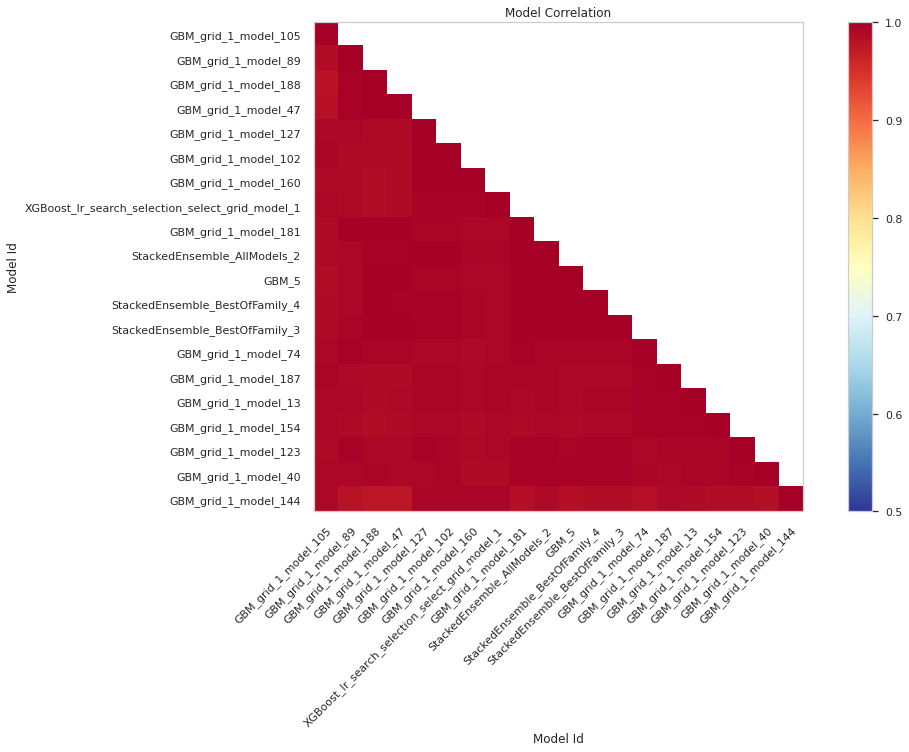

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

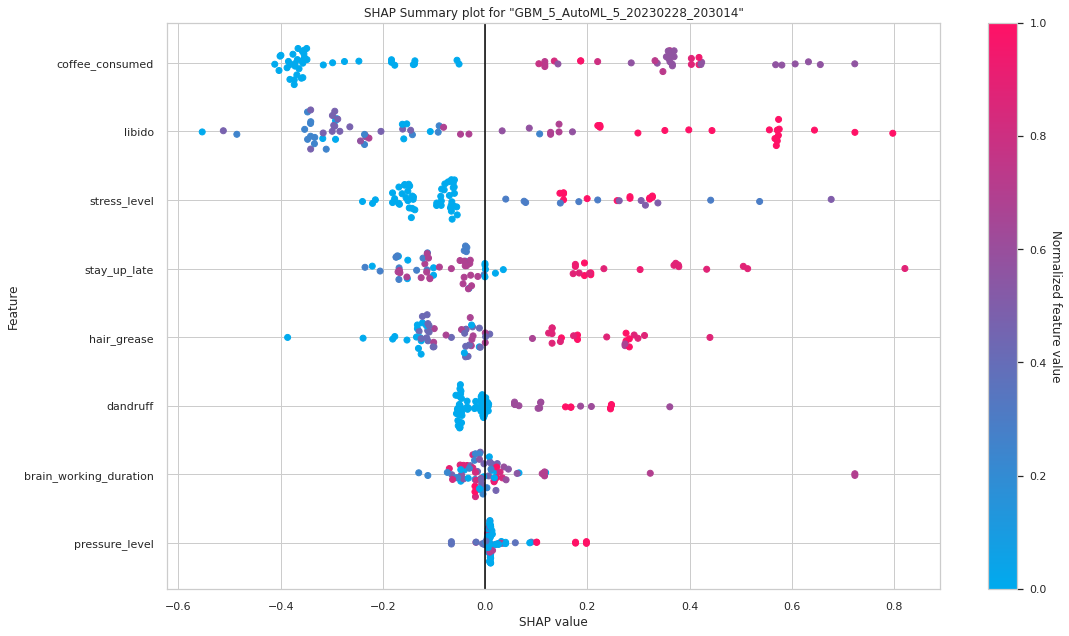

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

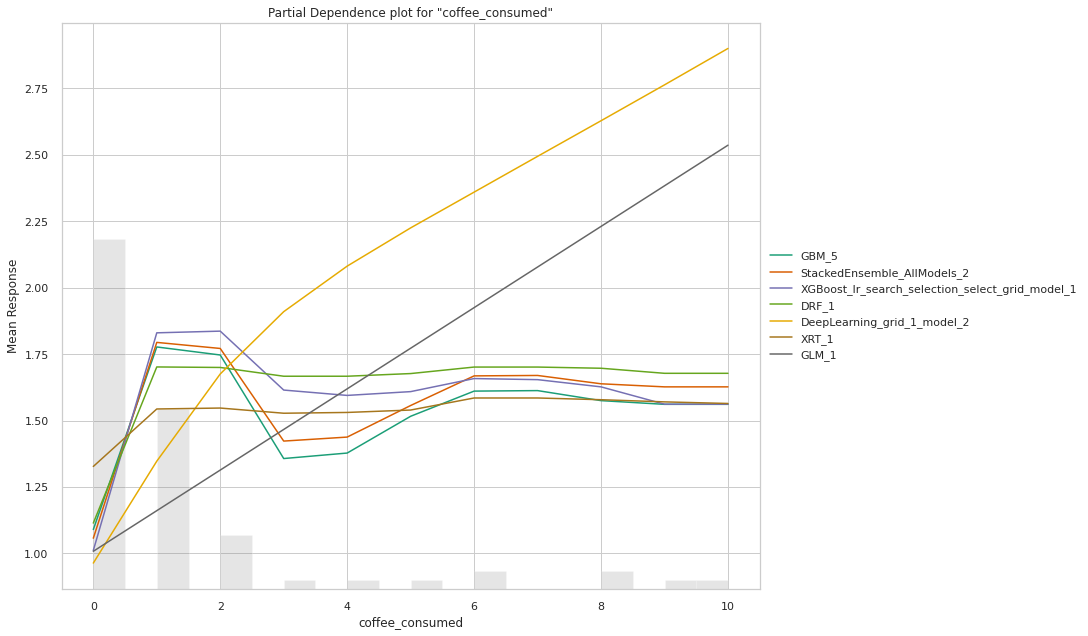

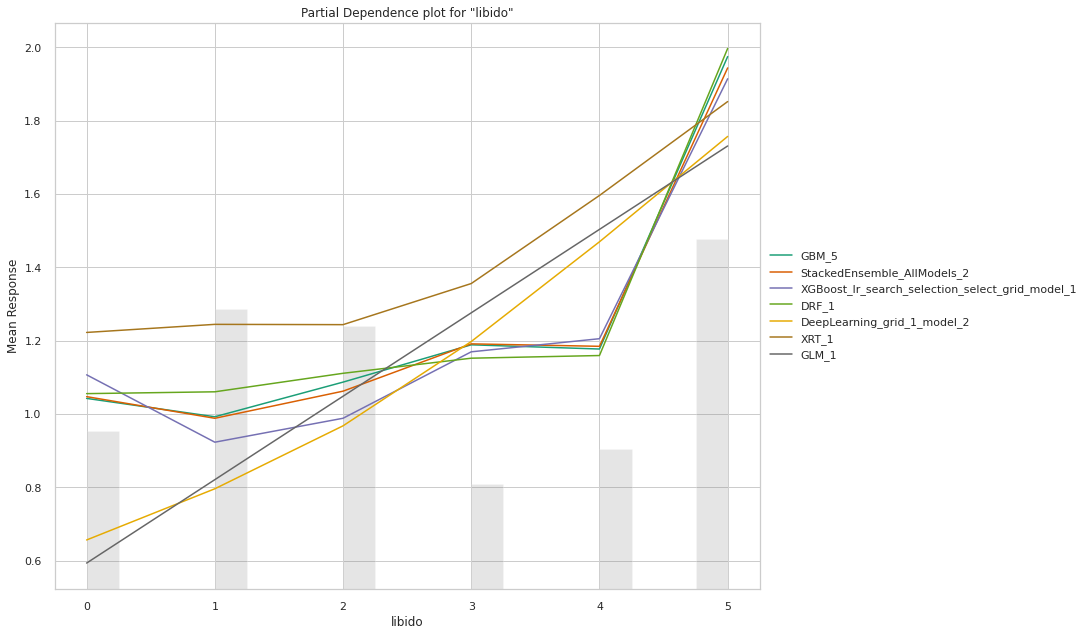

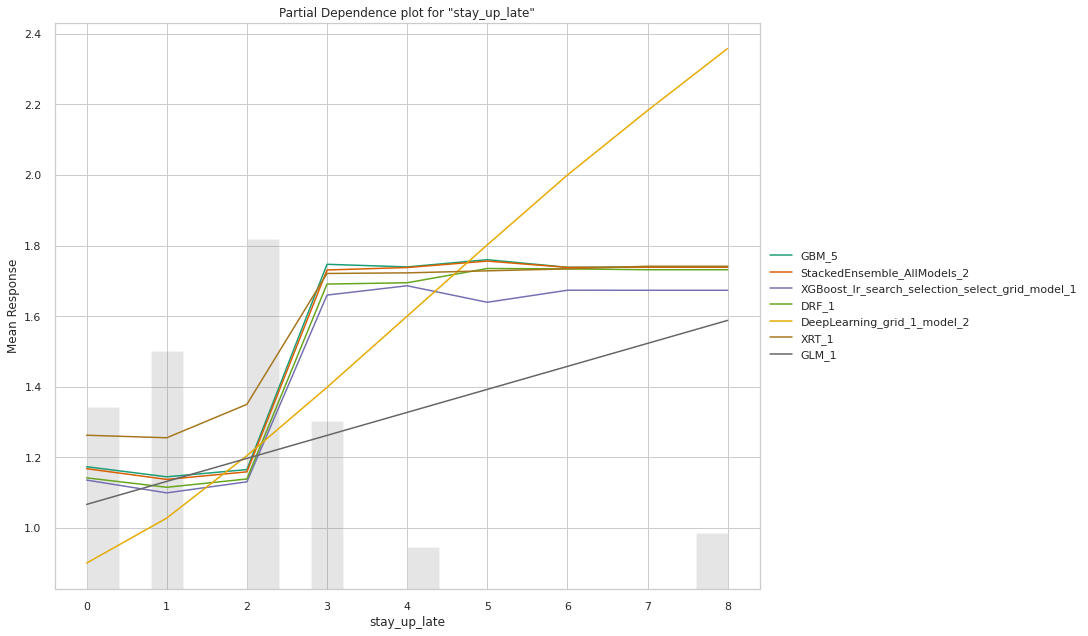

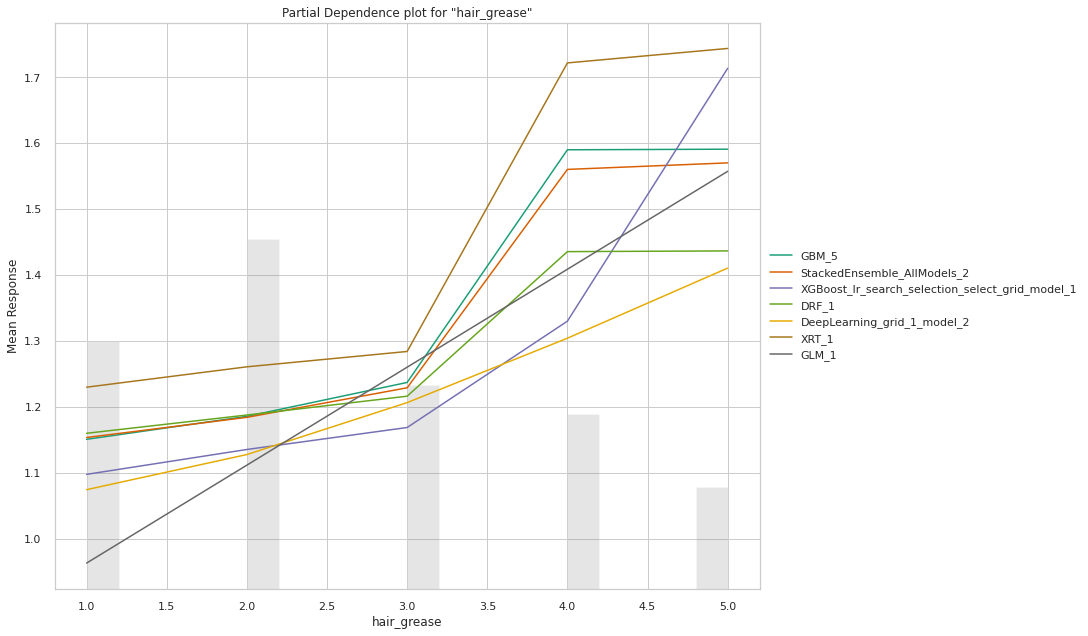

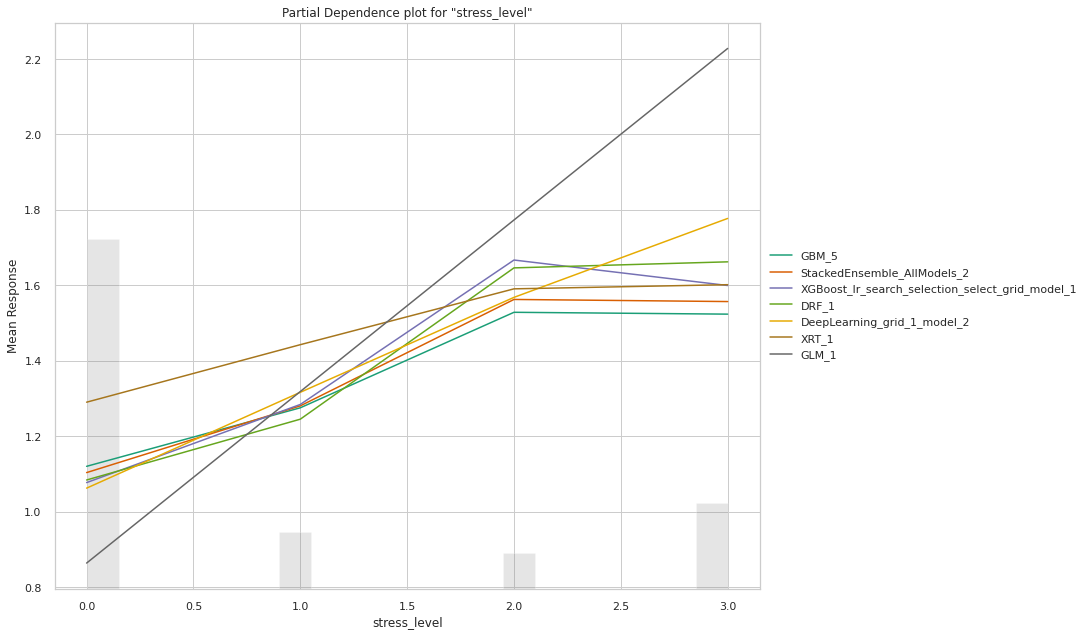

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

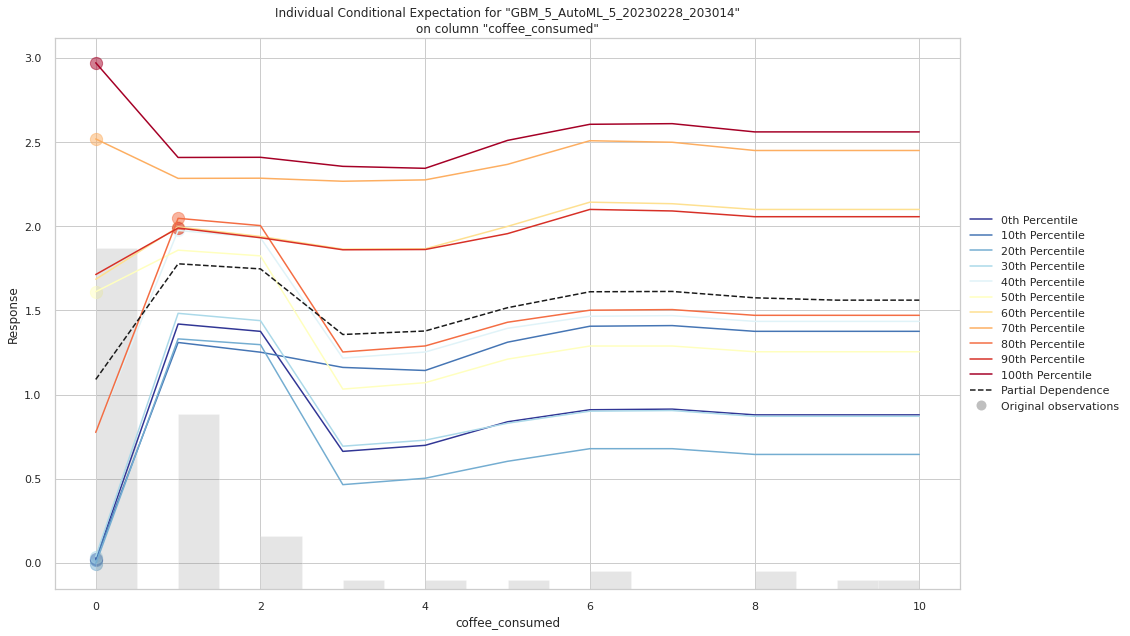

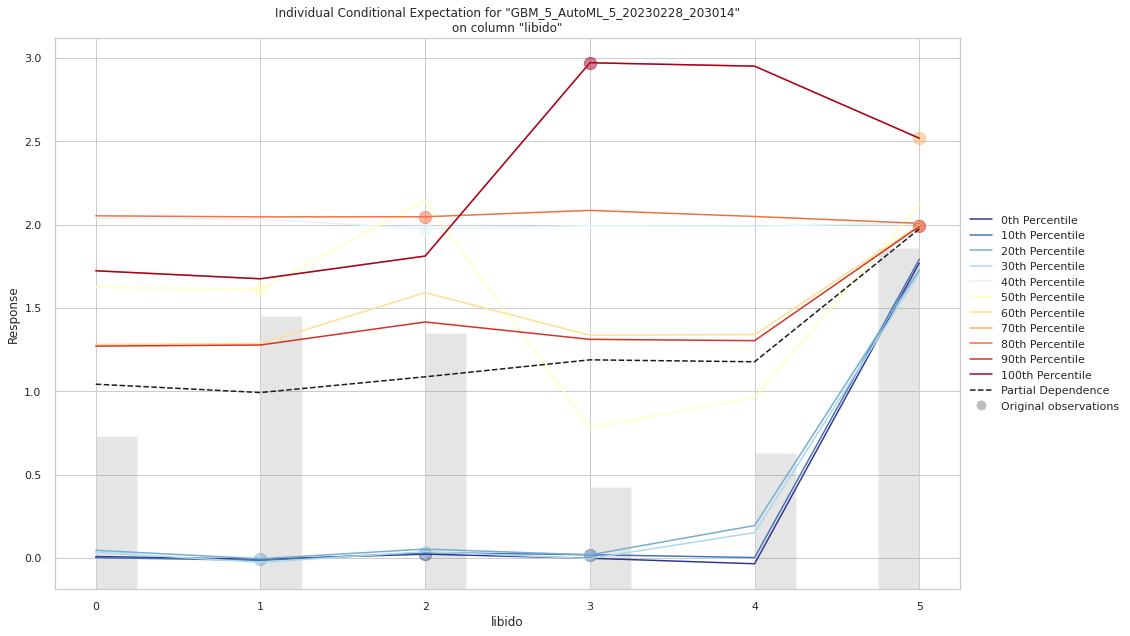

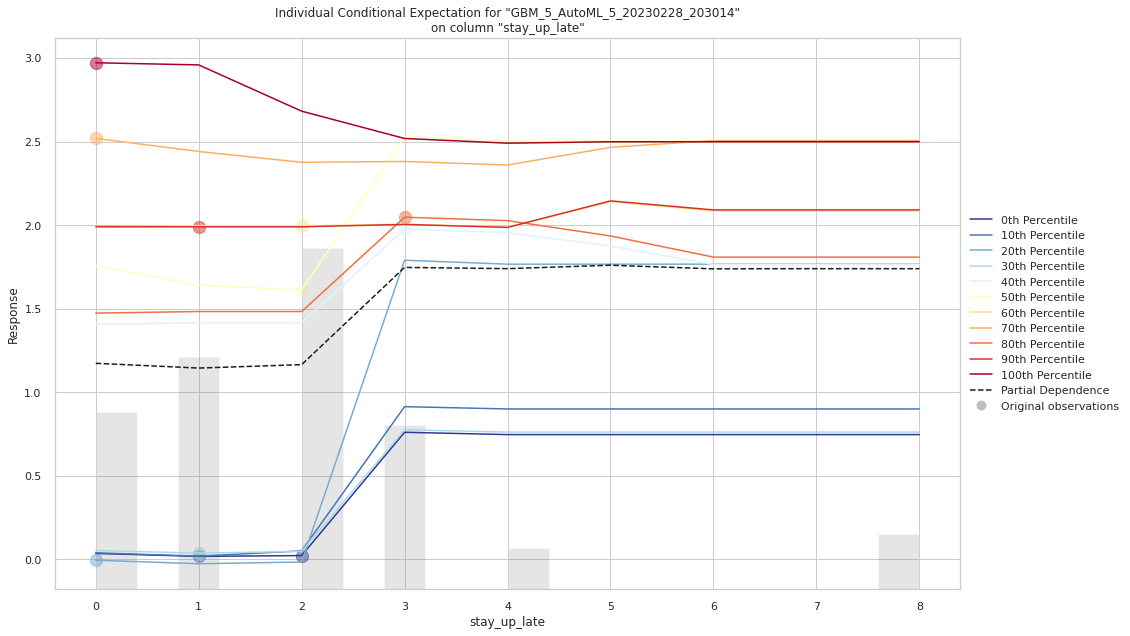

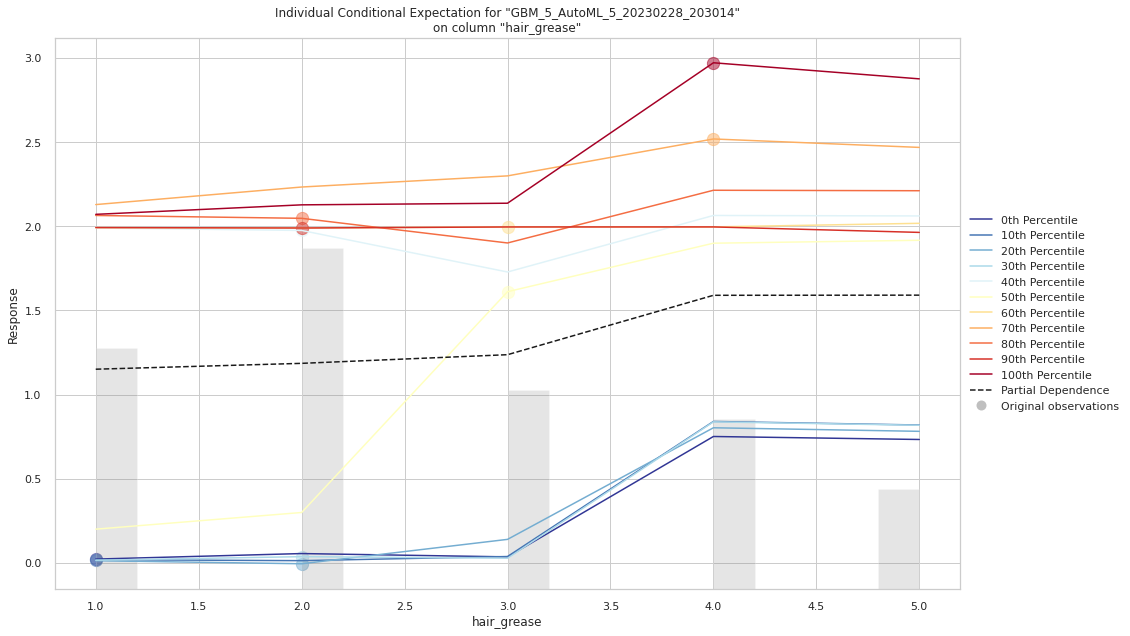

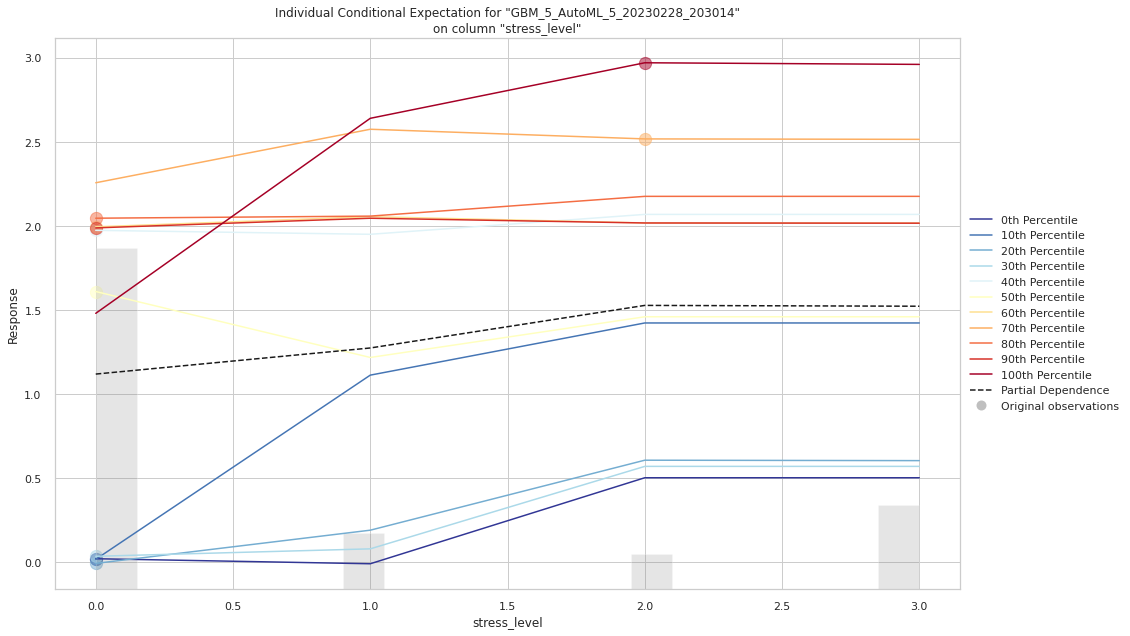

In [ ]:
exa = aml1.explain(df1_test)

# **HyperParameter Tuning**

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.



In [ ]:
s = imputed_data1['hair_loss']
t = imputed_data1.drop(['hair_loss'], axis = 1)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

mode = RandomForestRegressor()
param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals, n_iter=10, scoring='accuracy', cv=5,refit=True, n_jobs=-1)

#Training and prediction

random_rf.fit(t_train, s_train)
print('Best hyperparameters:', random_rf.best_params_)

s_pred = random_rf.best_estimator_.predict(t_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(s_test, s_pred)
print('Mean Squared Error:', mse)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculate the Mean Absolute Error
mae = np.mean(np.abs(s_test - s_pred))
print('Mean Absolute Error:', mae)

# Calculate the R-squared score
r2 = r2_score(s_test, s_pred)
print('R-squared score:', r2)


Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 200}
Mean Squared Error: 0.11560212830530361
Root Mean Squared Error: 0.3400031298463348
Mean Absolute Error: 0.1326345238095238
R-squared score: 0.8994764101693012


# **Conclusion:-**
A linear regression model was developed to predict hair loss, taking into consideration VIF, p-values, and other tests to eliminate some of the independent variables. The H20.ai framework was utilized to train and test the Luke Hair Loss Dataset variables, with the best-performing model being 'gbm,' with a test data accuracy of 89.9%. The results demonstrate that the linear regression model proposed can effectively analyze and predict hair loss to some degree. However, the prediction accuracy is still limited in some areas, and further research is needed to enhance the model. Techniques such as outlier removal and using ensemble or booster methods could help to improve the model's prediction accuracy in future studies.

# **Assignment Question/Answers**
Q1) Is the relationship significant? 

<br>

In statistical analysis, a relationship between variables is considered to be significant if the p value is less than 0.05, indicating a low probability of obtaining such results assuming the null hypothesis is true. The p value was calculated for the dataset in two ways, and the OLS method revealed that only 'Swimming', 'Dandruff', and 'Brain Working Duration' had p values greater than 0.05. Therefore, it can be inferred that the remaining variables in the dataset have a p value less than 0.05, indicating a significant relationship. Hence, for the chosen dataset, it can be concluded that the relationship between the variables is statistically significant except for 'Swimming', 'Dandruff', and 'Brain Working Duration'.

<br>

Q2) Are any model assumptions violated? Assumptions for linear regression are:

<br>

1] Linear Relationship :-  


To satisfy the assumption of a linear relationship between the dependent and independent variables, the graph should show a linear pattern while holding other variables constant. Upon plotting the target variable against all the independent variables, a linear relationship was observed for some of them, indicating that this assumption is not violated.

2] Homoscedasticity :-

Homoscedasticity, which refers to the normality of the error distribution, requires that the residuals plot form a bell-shaped curve indicating normal distribution. In this particular model, the sns heatmap was used to ensure that this requirement was met, and it was observed that the residuals plot exhibited a normal distribution and formed a bell-shaped curve.

3] No or little multicollinearity :-

The presence of multicollinearity, which indicates high correlation between independent variables, can be detected through the correlation matrix. In this particular model, it has been found that the assumptions of the linear regression model are violated since there is a high correlation of 0.92 between the independent variables Pressure Level and Dandruff, which is the highest correlation value in the matrix. This high correlation may result in unreliable and unstable coefficient estimates for the regression model.

4] No autocorrelation :-

The absence of autocorrelation, which means that the residuals are independent of each other, can be tested using the Durbin-Watson test. Typically, values between 1.5 to 2.5 indicate no autocorrelation. In this particular model, the Durbin-Watson test produced a value of 1.509, which falls within the acceptable range, indicating that this assumption is not violated. Therefore, it can be concluded that the residuals in this model are independent of each other.

<br>


Q3) Is there any multicollinearity in the model? 

<br>

In this particular model, it was observed that some of the independent variables had VIF values greater than 10 and their p-value was also greater than 0.05. The correlation matrix, heatmap, and VIF values indicated that there was multicollinearity between the independent variables, with the highest correlation being between Pressure Level and Dandruff. This multicollinearity issue can lead to unstable and unreliable coefficient estimates for the regression model.

<br>

Q4) In the multivariate models are predictor variables independent of all the other predictor variables? 

<br>

Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that Pressure Level and Dandruff are correlated to each other. Other than those other predictors are independent from each other.

<br>

Q5) In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

<br>

The variable importance plot displays the most important variables in descending order for determining the outcome variable in the model. In this particular model, stress level, staying up late, coffee consumption, libido, and hair grease were found to be the top five most important variables for determining hair loss.
However, it was observed that the VIF and p-value for the variable swimming were higher than the ideal values. Therefore, this variable was excluded from the model to address the multicollinearity issue and improve the stability and reliability of the coefficient estimates.

<br>

Q6) Does the model make sense? 

<br>

To ensure the reliability of a statistical model, it is essential to follow all the necessary assumptions, including normality, linearity, homoscedasticity, no autocorrelation, and absence of multicollinearity. In addition, the model should have a low RMSE, and the R-squared value should be high, indicating a good fit.
In this model, most of the assumptions were met, except for multicollinearity, which was addressed by excluding some variables from the model. The R-squared value of 0.89 suggests that the model has a good level of accuracy.So the model makes sense.

<br>

Q7) Does regularization help? 

<br>

It appears that the main goal of using regularization in this model was to minimize the validation loss and improve the accuracy. Three types of regularization techniques, namely Ridge, Lasso, and Elastic Net, were applied on the training data. However, after comparing the results, it was observed that the Root Mean Square Error (RMSE) and R2 values were different in all four cases, i.e., once without regularization and thrice with different types of regularization. Surprisingly, the results were worse when regularization was applied, indicating that regularization did not help to improve the model performance in this case.

<br>

Q8) Which independent variables are significant? 

<br>

Variables are significant when p-value is less than 0.05. For this model except for Swimming all other variables have p-value less than 0.05. So, it can be said that all variables are significant.

<br>

Q9) Which hyperparameters are important? 

<br>

Hyperparameter tuning is an important step in optimizing the performance of machine learning models. By systematically searching through a range of possible hyperparameters, we can find the combination that results in the best performance for a given dataset. In this case, the RandomForestRegressor was used to tune the hyperparameters for the hair loss prediction model, and the best combination was found to be n_estimators: 300, min_samples_split: 2, and max_depth: 200.

























# **LICENSE**

MIT License

Copyright (c) 2023 Poornachandra Kongara



Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

<br>

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

<br>



THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.



# **References** 
1. H20.ai- https://docs.h2o.ai/
2. OLS Model- http://net-informations.com/ds/mla/ols.html
3. Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/
4.Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/
5. Dataset- https://www.kaggle.com/datasets/lukexun/luke-hair-loss-dataset
6. Professor's AutoML Notebook-   https://github.com/aiskunks/YouTube/tree/main/A_Crash_Course_in_Statistical_Learning/AutoML
7. NoteBook:- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb
https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Basics_InnerWorkings_Interpretations.ipynb
8. ChatGPT Analysis for using Randomized Search , Linear Regression